### Dados


*   Bibliotecas
*   Obtendo dados

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io
from google.colab import drive
drive.mount('/content/drive')
import numpy.matlib
import numpy as np
import cv2
import itertools


from math import factorial
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.signal import savgol_filter
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#treino
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
scipy
from random import sample

Mounted at /content/drive


In [ ]:
polpa_prata = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_prata.mat').get('polpa_prata')
casca_prata = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/casca_prata.mat').get('casca_prata')

polpa_nanica = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_nanica.mat').get('polpa_nanica')
casca_nanica = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/casca_nanica.mat').get('casca_nanica')

polpa_maca = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_maca.mat').get('polpa_maca')
casca_maca = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/casca_maca.mat').get('casca_maca')

In [ ]:
lista_matrizes_tridimensionais = [polpa_prata, polpa_maca, polpa_nanica, casca_prata, casca_maca, casca_nanica]

In [ ]:
matriz_completa_tridimensional = np.vstack(lista_matrizes_tridimensionais) # estrutura os dados pra conseguir fazer operações

### Matrizes propriamente ditas e suas dimensões

In [ ]:
print(polpa_prata)

[[[0.55782795 0.54733944 0.54786873 ... 0.16184272 0.17214435 0.1738757 ]
  [0.56979901 0.56297845 0.55886936 ... 0.16428001 0.16265279 0.16639294]
  [0.55491781 0.54264367 0.53744072 ... 0.17171641 0.17616045 0.16810676]
  ...
  [0.35933763 0.36076447 0.35837549 ... 0.15477972 0.14724374 0.15895301]
  [0.34795994 0.34781554 0.34192702 ... 0.15486214 0.14922269 0.16066505]
  [0.35449719 0.35196528 0.34798837 ... 0.14874677 0.15577179 0.15215844]]

 [[0.46862596 0.4657979  0.46264645 ... 0.15038377 0.15648162 0.16733599]
  [0.49317673 0.49306792 0.48184589 ... 0.15786794 0.14728831 0.15836628]
  [0.47859335 0.47014579 0.46472996 ... 0.14503926 0.15199834 0.16648965]
  ...
  [0.35734236 0.34924629 0.34592187 ... 0.15604258 0.16122648 0.16541393]
  [0.34605935 0.34155399 0.34157252 ... 0.16893393 0.15748368 0.16386357]
  [0.35449719 0.3542355  0.35274753 ... 0.16276737 0.15155612 0.15692537]]

 [[0.39092144 0.38698852 0.38826272 ... 0.14044581 0.15230623 0.15454476]
  [0.40650147 0.403540

In [ ]:
print(casca_prata)

[[[1.21965873 1.23704886 1.24795306 ... 0.44010943 0.43114933 0.4613308 ]
  [1.34486985 1.32947624 1.36876154 ... 0.4495683  0.46808788 0.46833378]
  [1.3495332  1.34927261 1.32443881 ... 0.47016466 0.45691365 0.47034711]
  ...
  [0.40572056 0.40579125 0.40517271 ... 0.25071353 0.2597959  0.27526662]
  [0.40180686 0.39885959 0.40384176 ... 0.24495117 0.25352544 0.27190039]
  [0.37680864 0.37156868 0.37326854 ... 0.25094974 0.2774708  0.2538304 ]]

 [[1.47504318 1.52110708 1.56852829 ... 0.50840324 0.52714682 0.53779268]
  [1.51657915 1.53839314 1.51519096 ... 0.53175503 0.53287154 0.53851098]
  [1.44565666 1.43406534 1.44515955 ... 0.52548605 0.53274572 0.53293359]
  ...
  [0.39777431 0.39469647 0.39453253 ... 0.26836759 0.26514927 0.26908585]
  [0.39579707 0.39844188 0.39774042 ... 0.26222223 0.24667847 0.25978878]
  [0.37271827 0.37196434 0.37095597 ... 0.25253028 0.2469348  0.2538304 ]]

 [[1.44113457 1.43652129 1.41786134 ... 0.57597625 0.55055559 0.51556951]
  [1.45953035 1.398143

In [ ]:
print(polpa_nanica)

[[[0.38721436 0.38538095 0.38276544 ... 0.25823054 0.24972211 0.25317556]
  [0.39464262 0.39242461 0.39361027 ... 0.24653137 0.25060621 0.23658152]
  [0.4198128  0.41098213 0.41564339 ... 0.26488242 0.25617853 0.25577569]
  ...
  [0.41791162 0.4171907  0.41802895 ... 0.26144528 0.26688519 0.24954423]
  [0.41809037 0.4177019  0.42064181 ... 0.25492415 0.26230496 0.27689615]
  [0.41821593 0.41654104 0.41138044 ... 0.24840599 0.25531623 0.24520607]]

 [[0.42489555 0.42089185 0.42108497 ... 0.24086401 0.251459   0.25515738]
  [0.43260291 0.43242043 0.43135476 ... 0.24653137 0.25060621 0.25406912]
  [0.42157561 0.41864935 0.42408788 ... 0.25366303 0.25970739 0.26377913]
  ...
  [0.42763174 0.42569149 0.42533717 ... 0.26630864 0.25969532 0.27183309]
  [0.43871951 0.44143435 0.44109669 ... 0.26779211 0.25702879 0.2645784 ]
  [0.4447464  0.44271126 0.44327936 ... 0.24526188 0.25531623 0.26115847]]

 [[0.41604006 0.41699144 0.41853538 ... 0.26472187 0.26024926 0.26317635]
  [0.42671549 0.421418

In [ ]:
print(casca_nanica)

[[[1.24858379 1.26052046 1.24509275 ... 0.33295721 0.33970222 0.34223107]
  [1.2665354  1.27953291 1.2594496  ... 0.34181267 0.3442539  0.35491914]
  [1.2740165  1.28780997 1.28856397 ... 0.34084594 0.35120922 0.33748302]
  ...
  [0.39169288 0.39385465 0.38771382 ... 0.24137819 0.25802603 0.25897613]
  [0.386518   0.38165334 0.37684396 ... 0.2511524  0.24667847 0.24994755]
  [0.3772198  0.37554154 0.37442946 ... 0.24780586 0.25569528 0.26387376]]

 [[1.31294608 1.27274966 1.25664854 ... 0.33869231 0.35916117 0.34955987]
  [1.2665354  1.29882658 1.24222481 ... 0.33218271 0.33571881 0.34261814]
  [1.30334103 1.26607513 1.29805779 ... 0.33700633 0.34471223 0.33987424]
  ...
  [0.38954139 0.38883772 0.38890937 ... 0.24446772 0.24928318 0.25499722]
  [0.3823649  0.38366631 0.38187721 ... 0.23883726 0.24161316 0.25582549]
  [0.37886837 0.37355056 0.37637126 ... 0.25094974 0.25924957 0.24987723]]

 [[1.23099864 1.22577226 1.24225128 ... 0.34842241 0.32719767 0.33741301]
  [1.24229395 1.285869

In [ ]:
print(polpa_maca)

[[[0.35711119 0.34959003 0.35116753 ... 0.15798938 0.16781637 0.16410269]
  [0.34458148 0.34583139 0.34092525 ... 0.15659681 0.16123334 0.16316445]
  [0.34338614 0.33986938 0.34197611 ... 0.14875141 0.16604804 0.15376495]
  ...
  [0.32217681 0.32207614 0.31965154 ... 0.13626479 0.13637289 0.13859516]
  [0.33630827 0.33036318 0.32762459 ... 0.14245358 0.14650358 0.14042979]
  [0.34409544 0.34485352 0.34220162 ... 0.12793152 0.15155612 0.15852605]]

 [[0.34132892 0.33972856 0.33724368 ... 0.1529042  0.15230623 0.16089328]
  [0.3438375  0.34002823 0.34057352 ... 0.15029636 0.15840828 0.15362053]
  [0.35120168 0.33986938 0.34480858 ... 0.15753852 0.17179771 0.15533529]
  ...
  [0.33371085 0.32600895 0.33031797 ... 0.15101305 0.15417884 0.15258682]
  [0.34834105 0.34930208 0.34406015 ... 0.14001386 0.14245658 0.16066505]
  [0.35488728 0.35499489 0.35237956 ... 0.14500025 0.16145709 0.14277874]]

 [[0.34132892 0.33792669 0.33514062 ... 0.14663033 0.1454352  0.15929744]
  [0.34944871 0.346196

In [ ]:
print(casca_maca)

[[[0.54473609 0.54512739 0.54405236 ... 0.32170931 0.31504312 0.33502391]
  [0.58827007 0.58966559 0.58841854 ... 0.33600909 0.32734823 0.31901449]
  [0.61692846 0.6061179  0.61735821 ... 0.36057025 0.35120922 0.35203198]
  ...
  [0.38104054 0.37172124 0.37092975 ... 0.24137819 0.24071288 0.23563181]
  [0.38360667 0.37964964 0.38109905 ... 0.24341461 0.23660626 0.25385731]
  [0.39101127 0.38809356 0.38740876 ... 0.22641374 0.2469348  0.2440141 ]]

 [[0.51226419 0.51001084 0.50396883 ... 0.29654452 0.28982019 0.31636977]
  [0.55312395 0.54921293 0.53666264 ... 0.30630216 0.31107605 0.33540139]
  [0.56653529 0.56686294 0.56404132 ... 0.34084594 0.31360981 0.3280476 ]
  ...
  [0.3785224  0.37573585 0.37593594 ... 0.23223929 0.25450775 0.24135131]
  [0.38071471 0.37845185 0.37607476 ... 0.24341461 0.25352544 0.23090985]
  [0.40350351 0.40484503 0.39996526 ... 0.229406   0.23495965 0.23441477]]

 [[0.48410511 0.48001409 0.48030642 ... 0.26782653 0.27682194 0.28130579]
  [0.51560479 0.505807

In [ ]:
print("Dimensões polpa prata: ", polpa_prata.shape)
print("Dimensões polpa nanica: ", polpa_nanica.shape)
print("Dimensões polpa maçã: ", polpa_maca.shape)

Dimensões polpa prata:  (380, 320, 230)
Dimensões polpa nanica:  (400, 320, 230)
Dimensões polpa maçã:  (385, 320, 230)


In [ ]:
print("Dimensões casca prata: ", casca_prata.shape)
print("Dimensões casca nanica: ", casca_nanica.shape)
print("Dimensões casca maçã: ", casca_maca.shape)

Dimensões casca prata:  (236, 320, 230)
Dimensões casca nanica:  (290, 320, 230)
Dimensões casca maçã:  (231, 320, 230)


### Pré processamento de dados

In [ ]:
# reorganiza a matriz dados de forma que ela tenha altura * largura linhas e
# comprimento_de_onda colunas.

for dados in lista_matrizes_tridimensionais:
    altura, largura, comprimento_de_onda = dados.shape
    matriz_bidimensional = dados.reshape(altura * largura, comprimento_de_onda)
    print(matriz_bidimensional)

[[0.55782795 0.54733944 0.54786873 ... 0.16184272 0.17214435 0.1738757 ]
 [0.56979901 0.56297845 0.55886936 ... 0.16428001 0.16265279 0.16639294]
 [0.55491781 0.54264367 0.53744072 ... 0.17171641 0.17616045 0.16810676]
 ...
 [0.35933763 0.35766298 0.35393921 ... 0.15226498 0.16264984 0.16704428]
 [0.3533262  0.35154143 0.34763879 ... 0.14613906 0.14650358 0.16226137]
 [0.35216406 0.34708679 0.3418425  ... 0.15889846 0.15860514 0.15215844]]
[[0.35711119 0.34959003 0.35116753 ... 0.15798938 0.16781637 0.16410269]
 [0.34458148 0.34583139 0.34092525 ... 0.15659681 0.16123334 0.16316445]
 [0.34338614 0.33986938 0.34197611 ... 0.14875141 0.16604804 0.15376495]
 ...
 [0.35259083 0.3515256  0.35137215 ... 0.2055541  0.21726991 0.20455377]
 [0.35140204 0.35154143 0.34763879 ... 0.21123511 0.22017938 0.20596954]
 [0.37978294 0.3812336  0.36887157 ... 0.19782536 0.20034476 0.19707042]]
[[0.38721436 0.38538095 0.38276544 ... 0.25823054 0.24972211 0.25317556]
 [0.39464262 0.39242461 0.39361027 ... 

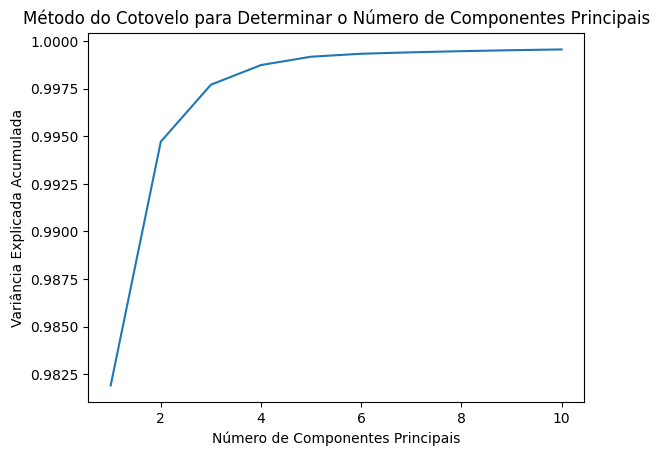

In [ ]:
import numpy as np
import scipy.io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Seu código para carregar os dados permanece inalterado

# Combine todas as matrizes tridimensionais em uma única matriz
lista_matrizes_tridimensionais = [polpa_prata, polpa_maca, polpa_nanica, casca_prata, casca_maca, casca_nanica]
matriz_completa_tridimensional = np.vstack(lista_matrizes_tridimensionais)

# Reorganize a matriz para que ela tenha altura * largura linhas e comprimento_de_onda colunas
altura, largura, comprimento_de_onda = matriz_completa_tridimensional.shape
matriz_bidimensional = matriz_completa_tridimensional.reshape(altura * largura, comprimento_de_onda)

# Aplique PCA
pca = PCA()
pca.fit(matriz_bidimensional)

# Plote a variância explicada acumulada
num_componentes = 10  # Altere para o número desejado de componentes principais
plt.plot(range(1, num_componentes + 1), np.cumsum(pca.explained_variance_ratio_[:num_componentes]))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Método do Cotovelo para Determinar o Número de Componentes Principais')
plt.show()


In [ ]:
# PCA
n_componentes = 2  # Defina o número desejado de componentes principais
pca = PCA(n_components=n_componentes)
dados_reduzidos = pca.fit_transform(matriz_bidimensional)

In [ ]:
print(dados_reduzidos)

[[ 1.49634773 -0.1816844 ]
 [ 1.51085674 -0.20426467]
 [ 1.51329178 -0.24254853]
 ...
 [-8.15174821  0.3677084 ]
 [-8.29202165  0.33026463]
 [-8.42522113  0.23342299]]


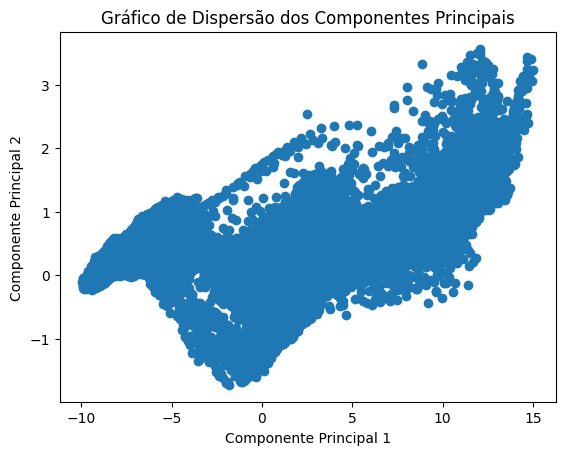

In [ ]:
import matplotlib.pyplot as plt

# Suponha que 'dados_reduzidos' seja uma matriz com duas colunas (2 componentes principais)
plt.scatter(dados_reduzidos[:, 0], dados_reduzidos[:, 1])
plt.title('Gráfico de Dispersão dos Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [ ]:
# Plot
cores = ['r', 'g', 'b', 'c', 'm', 'y']  # Cores para cada conjunto de dados
for i, dados_red in enumerate(dados_reduzidos):
    plt.scatter(dados_red[:, 0], dados_red[:, 1], label=f'Dados {i+1}', color=cores[i])

plt.title('PCA - Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

IndexError: ignored

In [ ]:
# Kmeans

# Inicialização dos centroides aleatórios
k = 2  # Defina o número desejado de clusters
kmeans = KMeans(n_clusters=k, init='random', random_state=0, n_init=1)
kmeans.fit(dados_reduzidos)

# Centroides finais
centroides_finais = kmeans.cluster_centers_


In [ ]:
print(centroides_finais)

[[ 1.62404081 -0.05730744]
 [-7.93580614  0.28003035]]


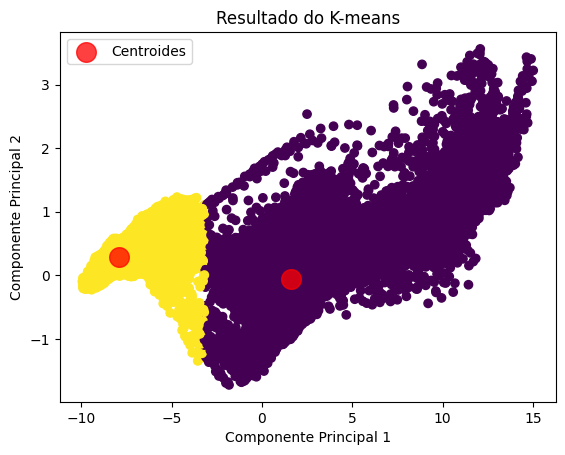

In [ ]:
import matplotlib.pyplot as plt

# Obtenha os rótulos de cluster a partir do modelo K-means
labels = kmeans.labels_

# Visualizar os clusters
plt.scatter(dados_reduzidos[:, 0], dados_reduzidos[:, 1], c=labels, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centroides')
plt.title('Resultado do K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Preparação dos dados
X_train, X_test, y_train, y_test = train_test_split(matriz_bidimensional, labels, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definição do MLP
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', max_iter=1000, random_state=42)

# Treinamento
mlp.fit(X_train, y_train)

# Previsões
y_pred = mlp.predict(X_test)

# Avaliação do desempenho
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')


Acurácia: 0.9997306034482759


### Plotando polpa_prata

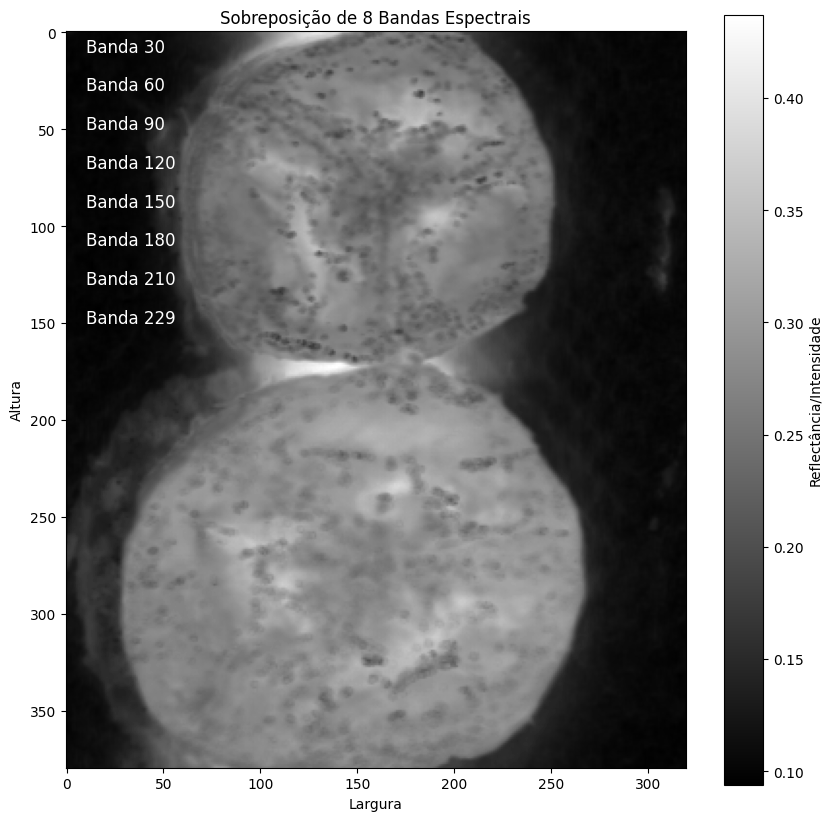

In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Carregue os dados
polpa_prata = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_prata.mat')['polpa_prata']

# Escolha as bandas espectrais que deseja sobrepor (substitua por índices de bandas desejados)
banda1 = 30
banda2 = 60
banda3 = 90
banda4 = 120
banda5 = 150
banda6 = 180
banda7 = 210
banda8 = 229  # O índice máximo permitido é 229

# Normalize os valores para exibir na faixa de 0 a 1 (opcional, mas pode melhorar a visualização)
polpa_prata = (polpa_prata - np.min(polpa_prata)) / (np.max(polpa_prata) - np.min(polpa_prata))

# Exiba as bandas espectrais escolhidas sobrepostas
fig, ax = plt.subplots(figsize=(10, 10))
imagem_sobreposta = (polpa_prata[:, :, banda1] + polpa_prata[:, :, banda2] + polpa_prata[:, :, banda3] +
                     polpa_prata[:, :, banda4] + polpa_prata[:, :, banda5] + polpa_prata[:, :, banda6] +
                     polpa_prata[:, :, banda7] + polpa_prata[:, :, banda8]) / 8.0
ax.imshow(imagem_sobreposta, cmap='gray')
ax.set_title('Sobreposição de 8 Bandas Espectrais')
ax.set_xlabel('Largura')
ax.set_ylabel('Altura')
plt.colorbar(ax.imshow(imagem_sobreposta, cmap='gray'), ax=ax, label='Reflectância/Intensidade')

# Adicione marcações ou legenda para indicar as bandas usadas
bandas_selecionadas = [banda1, banda2, banda3, banda4, banda5, banda6, banda7, banda8]
for i, banda in enumerate(bandas_selecionadas):
    ax.annotate(f'Banda {banda}', (10, 10 + i * 20), color='white', fontsize=12)

plt.show()


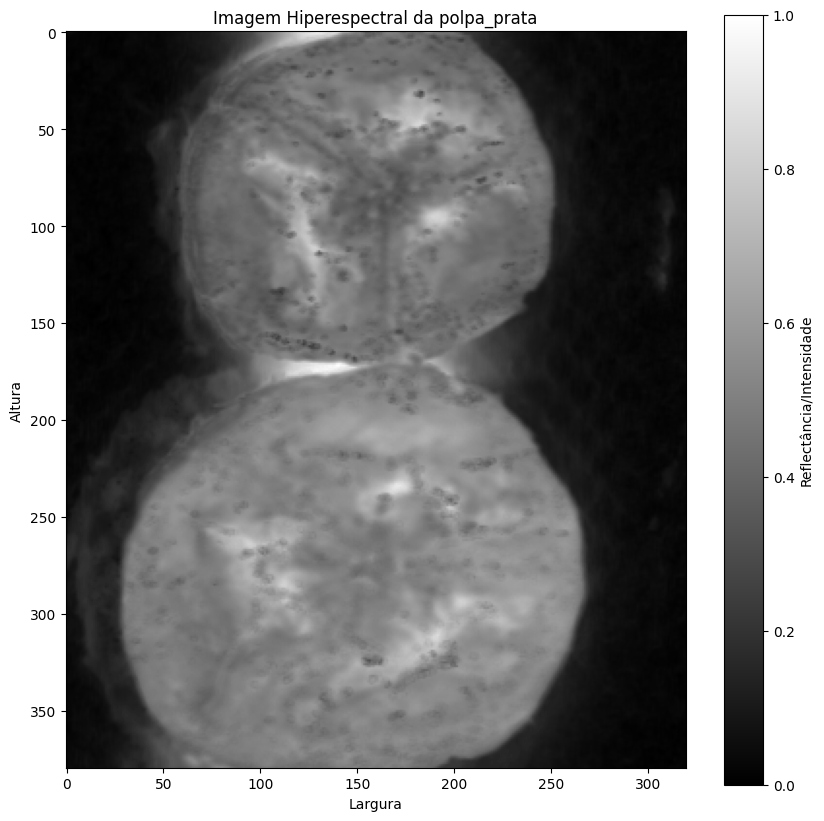

In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Carregue os dados
polpa_prata = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_prata.mat')['polpa_prata']

# Escolha uma banda espectral específica para exibição (substitua pelo índice da banda desejada)
banda_espectral = 100  # Substitua pelo índice da banda desejada

# Extraia a banda espectral escolhida
banda_selecionada = polpa_prata[:, :, banda_espectral]

# Normalize os valores para exibir na faixa de 0 a 1 (opcional, mas pode melhorar a visualização)
banda_selecionada = (banda_selecionada - np.min(banda_selecionada)) / (np.max(banda_selecionada) - np.min(banda_selecionada))

# Exiba a imagem hiperespectral da banda selecionada
plt.figure(figsize=(10, 10))
plt.imshow(banda_selecionada, cmap='gray')  # Use cmap='gray' para imagens em escala de cinza
plt.title(f'Imagem Hiperespectral da polpa_prata')
plt.xlabel('Largura')
plt.ylabel('Altura')
plt.colorbar(label='Reflectância/Intensidade')
plt.show()


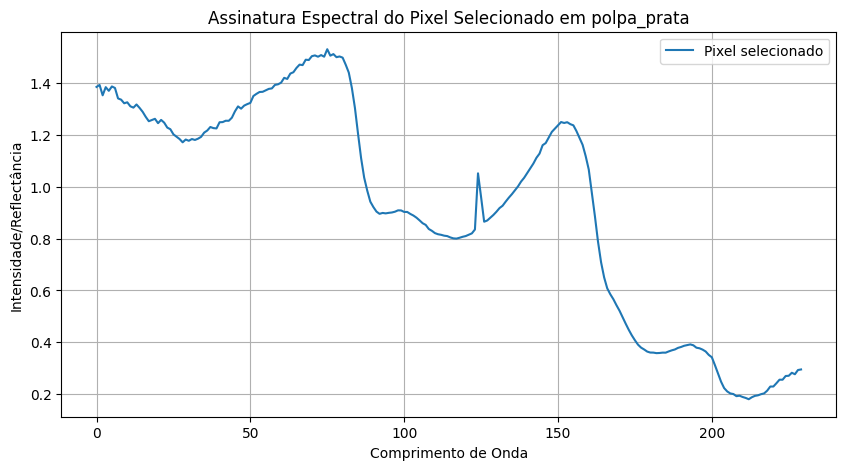

In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Carregue os dados
polpa_prata = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_prata.mat')['polpa_prata']

# Escolha as coordenadas do pixel que deseja plotar
altura_pixel = 100  # Substitua pelo valor da altura do pixel desejado
largura_pixel = 150  # Substitua pelo valor da largura do pixel desejado

# Extraia a assinatura espectral do pixel escolhido
assinatura_espectral = polpa_prata[altura_pixel, largura_pixel, :]

# Crie um gráfico de linha para a assinatura espectral
comprimento_de_onda = np.arange(len(assinatura_espectral))  # Valores de comprimento de onda
plt.figure(figsize=(10, 5))
plt.plot(comprimento_de_onda, assinatura_espectral, label='Pixel selecionado')
plt.xlabel('Comprimento de Onda')
plt.ylabel('Intensidade/Reflectância')
plt.title('Assinatura Espectral do Pixel Selecionado em polpa_prata')
plt.legend()
plt.grid(True)

# Exiba o gráfico
plt.show()


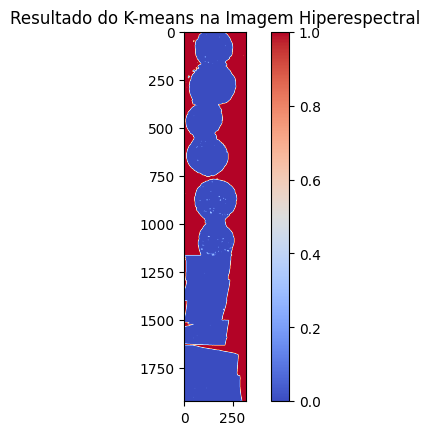

In [ ]:
import numpy as np
import scipy.io
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Carregar os dados hiperespectrais
polpa_prata = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_prata.mat').get('polpa_prata')
# ... carregue os outros dados hiperespectrais

# Combine todas as matrizes tridimensionais em uma única matriz tridimensional
lista_matrizes_tridimensionais = [polpa_prata, polpa_maca, polpa_nanica, casca_prata, casca_maca, casca_nanica]
matriz_completa_tridimensional = np.vstack(lista_matrizes_tridimensionais)

# Realize a PCA nos dados hiperespectrais
altura, largura, comprimento_de_onda = matriz_completa_tridimensional.shape
matriz_bidimensional = matriz_completa_tridimensional.reshape(altura * largura, comprimento_de_onda)

n_componentes = 2  # Defina o número desejado de componentes principais
pca = PCA(n_components=n_componentes)
dados_reduzidos = pca.fit_transform(matriz_bidimensional)

# Aplique o K-means aos dados reduzidos
k = 2  # Defina o número desejado de clusters
kmeans = KMeans(n_clusters=k, init='random', random_state=0, n_init=1)
kmeans.fit(dados_reduzidos)

# Obtenha os rótulos de cluster
labels = kmeans.labels_

# Crie uma imagem de rótulos com as mesmas dimensões da imagem original
imagem_de_rotulos = labels.reshape(altura, largura)

# Crie uma imagem colorida para visualizar os clusters
plt.imshow(imagem_de_rotulos, cmap='coolwarm')
plt.colorbar()
plt.title('Resultado do K-means na Imagem Hiperespectral')
plt.show()


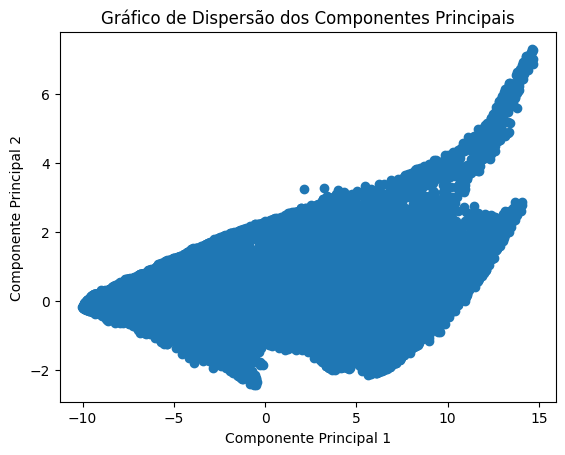

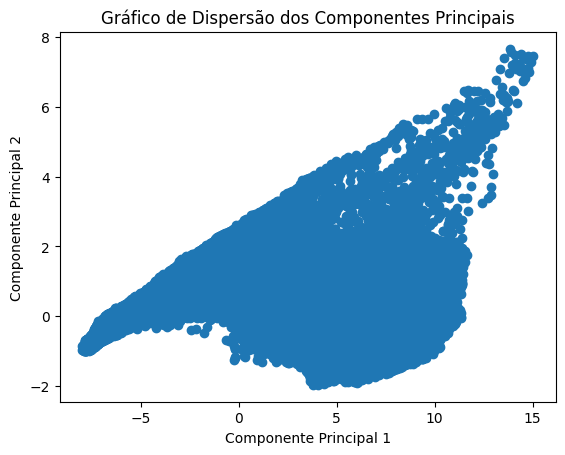

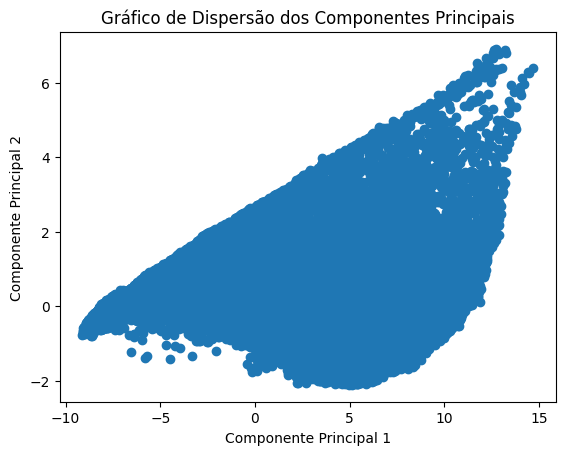

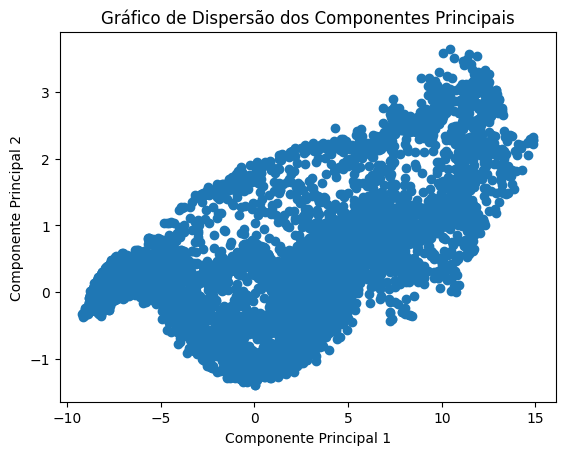

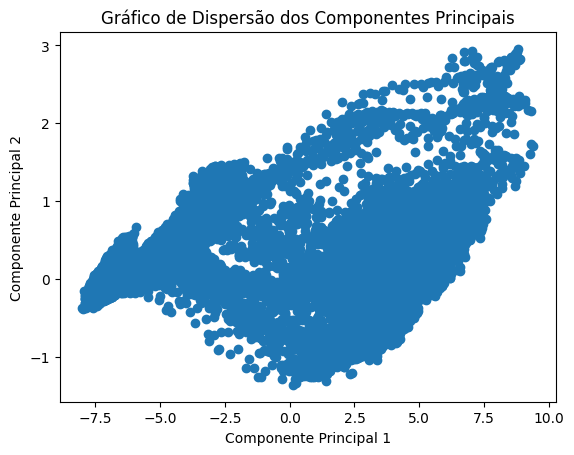

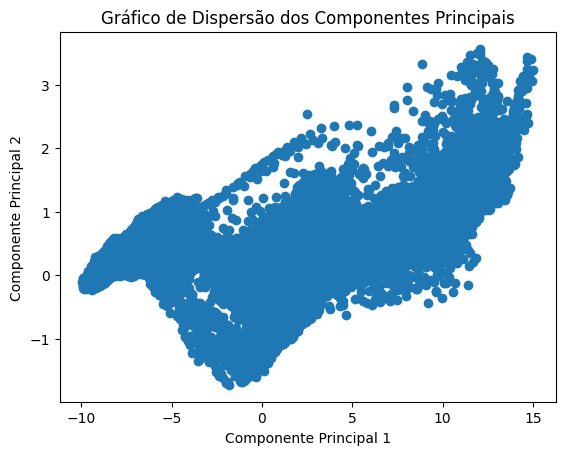

In [ ]:
import numpy as np
import scipy.io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Carregar as matrizes tridimensionais
polpa_prata = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_prata.mat').get('polpa_prata')
casca_prata = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/casca_prata.mat').get('casca_prata')
polpa_nanica = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_nanica.mat').get('polpa_nanica')
casca_nanica = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/casca_nanica.mat').get('casca_nanica')
polpa_maca = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_maca.mat').get('polpa_maca')
casca_maca = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/casca_maca.mat').get('casca_maca')

lista_matrizes_tridimensionais = [polpa_prata, polpa_maca, polpa_nanica, casca_prata, casca_maca, casca_nanica]

# Iterar sobre as matrizes e aplicar PCA individualmente
for dados in lista_matrizes_tridimensionais:
    altura, largura, comprimento_de_onda = dados.shape
    matriz_bidimensional = dados.reshape(altura * largura, comprimento_de_onda)

    # Aplicar PCA
    n_componentes = 2
    pca = PCA(n_components=n_componentes)
    dados_reduzidos = pca.fit_transform(matriz_bidimensional)

    # Plotar os resultados do PCA
    plt.scatter(dados_reduzidos[:, 0], dados_reduzidos[:, 1])
    plt.title('Gráfico de Dispersão dos Componentes Principais')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.show()

# Continuar com o código do K-means, se necessário


In [ ]:
# Importe a biblioteca numpy
import numpy as np

# Variância dos PCs
variancia_pcs = pca.explained_variance_

# Variância relativa (em porcentagem) dos PCs
variancia_rel_pcs = pca.explained_variance_ratio_ * 100

# Variância cumulativa relativa (em porcentagem)
variancia_cumulativa_rel = np.cumsum(variancia_rel_pcs)

# Exibindo as informações
for i in range(n_componentes):
    print(f"Variância do PC-{i+1}: {variancia_pcs[i]}")
    print(f"Variância relativa do PC-{i+1}: {variancia_rel_pcs[i]:.2f}%")

print(f"Variância cumulativa relativa (até o {n_componentes}-ésimo PC): {variancia_cumulativa_rel[n_componentes-1]:.2f}%")



#Importamos a biblioteca NumPy para realizar cálculos numéricos.
#pca.explained_variance_ fornece a variância de cada um dos PCs, que representa a quantidade de informação
#contida em cada componente principal.
#pca.explained_variance_ratio_ retorna a proporção da variância explicada por cada PC em relação à variância
#total.
#np.cumsum(variancia_rel_pcs) calcula a variância cumulativa relativa para que você possa entender quanto da
#variância total é explicada pelos PCs anteriores.
#A impressão dessas informações fornecerá detalhes sobre a variância de cada PC, a variância relativa (em
#porcentagem) e a variância cumulativa relativa, o que é útil para decidir quantos PCs usar para reduzir a dimensionalidade de seus dados.

Variância do PC-1: 15.847595925941935
Variância relativa do PC-1: 98.21%
Variância do PC-2: 0.2283726110084407
Variância relativa do PC-2: 1.42%
Variância cumulativa relativa (até o 2-ésimo PC): 99.62%


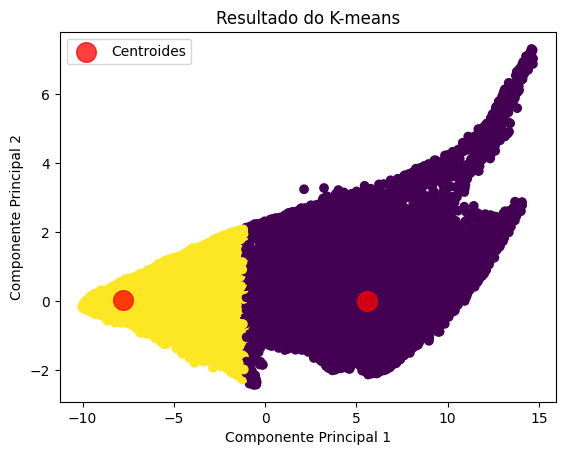

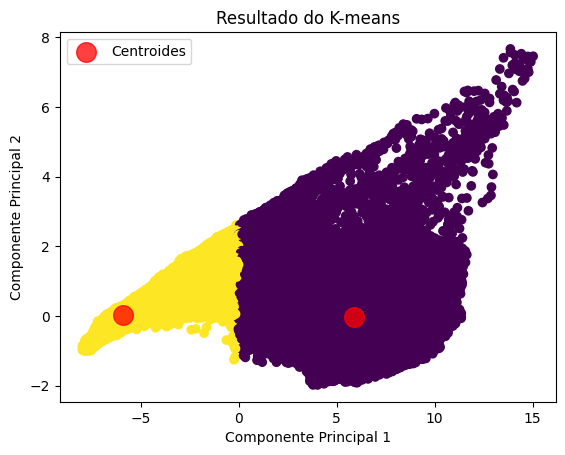

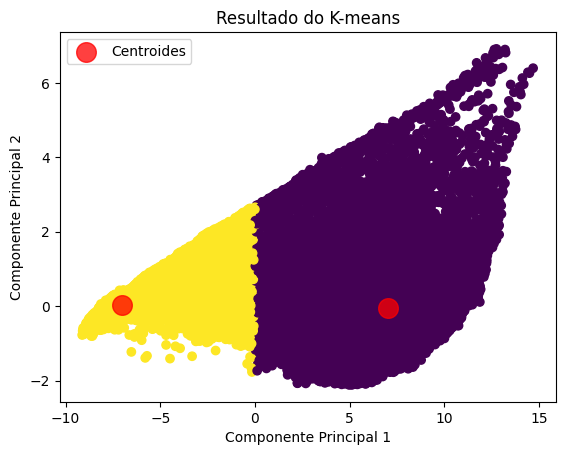

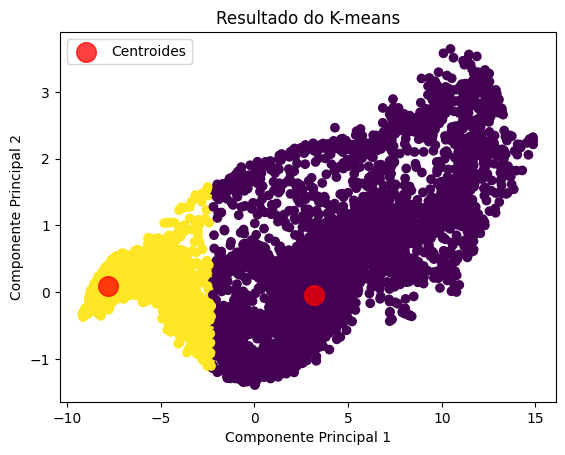

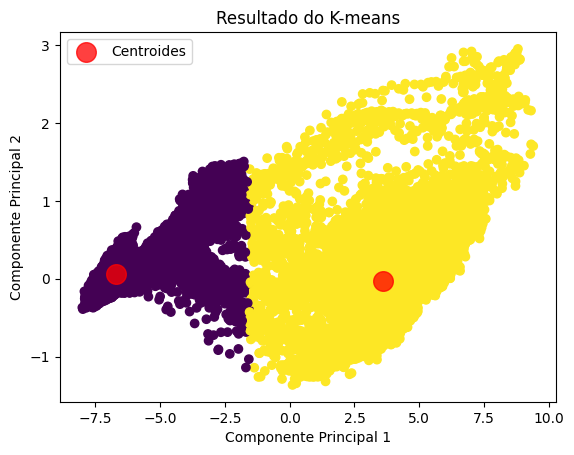

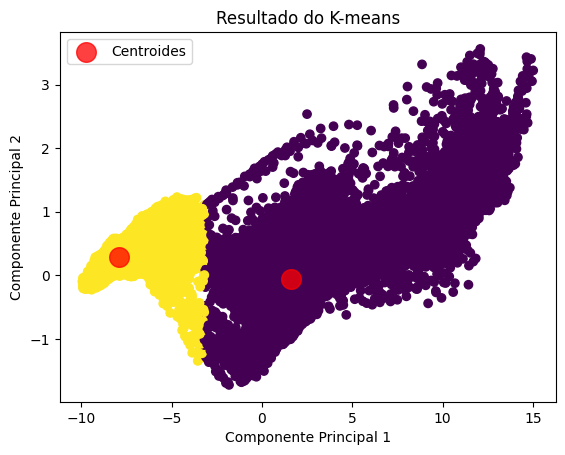

In [ ]:
import numpy as np
import scipy.io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Carregar as matrizes tridimensionais
polpa_prata = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_prata.mat').get('polpa_prata')
casca_prata = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/casca_prata.mat').get('casca_prata')
polpa_nanica = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_nanica.mat').get('polpa_nanica')
casca_nanica = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/casca_nanica.mat').get('casca_nanica')
polpa_maca = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_maca.mat').get('polpa_maca')
casca_maca = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/casca_maca.mat').get('casca_maca')

lista_matrizes_tridimensionais = [polpa_prata, polpa_maca, polpa_nanica, casca_prata, casca_maca, casca_nanica]

# Iterar sobre as matrizes e aplicar PCA e K-Means individualmente
for dados in lista_matrizes_tridimensionais:
    altura, largura, comprimento_de_onda = dados.shape
    matriz_bidimensional = dados.reshape(altura * largura, comprimento_de_onda)

    # Aplicar PCA
    n_componentes = 2
    pca = PCA(n_components=n_componentes)
    dados_reduzidos = pca.fit_transform(matriz_bidimensional)

    # Aplicar K-Means
    k = 2
    kmeans = KMeans(n_clusters=k, init='random', random_state=0, n_init=1)
    kmeans.fit(dados_reduzidos)

    # Plotar os resultados do K-Means
    labels = kmeans.labels_
    plt.scatter(dados_reduzidos[:, 0], dados_reduzidos[:, 1], c=labels, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centroides')
    plt.title('Resultado do K-means')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.show()


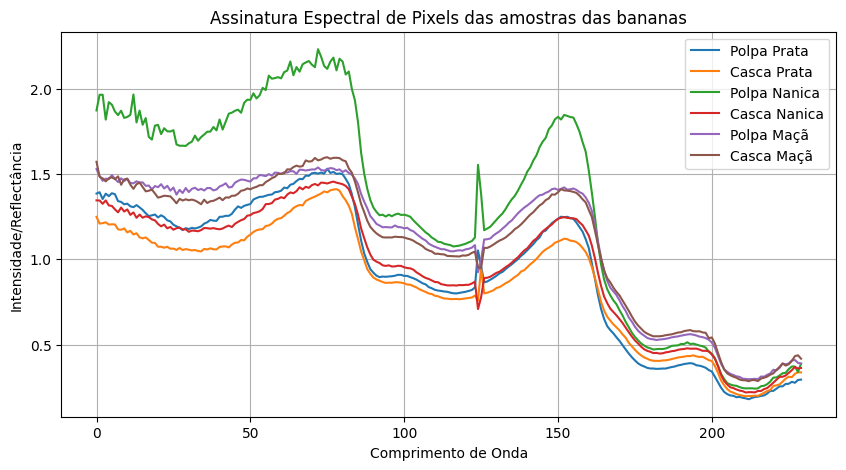

In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Carregue os dados das 6 amostras
polpa_prata = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_prata.mat')['polpa_prata']
casca_prata = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/casca_prata.mat')['casca_prata']
polpa_nanica = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_nanica.mat')['polpa_nanica']
casca_nanica = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/casca_nanica.mat')['casca_nanica']
polpa_maca = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/polpa_maca.mat')['polpa_maca']
casca_maca = scipy.io.loadmat('/content/drive/MyDrive/hsi/banana/casca_maca.mat')['casca_maca']

# Escolha as coordenadas do pixel que deseja analisar
altura_pixel = 100
largura_pixel = 150

# Extraia a assinatura espectral do pixel escolhido em cada amostra
assinatura_polpa_prata = polpa_prata[altura_pixel, largura_pixel, :]
assinatura_casca_prata = casca_prata[altura_pixel, largura_pixel, :]
assinatura_polpa_nanica = polpa_nanica[altura_pixel, largura_pixel, :]
assinatura_casca_nanica = casca_nanica[altura_pixel, largura_pixel, :]
assinatura_polpa_maca = polpa_maca[altura_pixel, largura_pixel, :]
assinatura_casca_maca = casca_maca[altura_pixel, largura_pixel, :]

# Crie um gráfico de linha para a assinatura espectral de cada amostra
comprimento_de_onda = np.arange(len(assinatura_polpa_prata))  # Valores de comprimento de onda

plt.figure(figsize=(10, 5))
plt.plot(comprimento_de_onda, assinatura_polpa_prata, label='Polpa Prata')
plt.plot(comprimento_de_onda, assinatura_casca_prata, label='Casca Prata')
plt.plot(comprimento_de_onda, assinatura_polpa_nanica, label='Polpa Nanica')
plt.plot(comprimento_de_onda, assinatura_casca_nanica, label='Casca Nanica')
plt.plot(comprimento_de_onda, assinatura_polpa_maca, label='Polpa Maçã')
plt.plot(comprimento_de_onda, assinatura_casca_maca, label='Casca Maçã')

plt.xlabel('Comprimento de Onda')
plt.ylabel('Intensidade/Reflectância')
plt.title('Assinatura Espectral de Pixels das amostras das bananas')
plt.legend()
plt.grid(True)

# Exiba o gráfico
plt.show()


### MLP

#### divisão dos dados para treinamento e teste

In [ ]:
#dividindo os dados
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dados_reduzidos, labels, test_size=0.2, random_state=42)


Epoch 1/100
49/49 [==============================] - 3s 5ms/step - loss: 1.7978 - accuracy: 0.2154
Epoch 2/100
49/49 [==============================] - 0s 5ms/step - loss: 1.7699 - accuracy: 0.2134
Epoch 3/100
49/49 [==============================] - 0s 6ms/step - loss: 1.7576 - accuracy: 0.2440
Epoch 4/100
49/49 [==============================] - 0s 6ms/step - loss: 1.7549 - accuracy: 0.2349
Epoch 5/100
49/49 [==============================] - 0s 9ms/step - loss: 1.7407 - accuracy: 0.2655
Epoch 6/100
49/49 [==============================] - 0s 4ms/step - loss: 1.7345 - accuracy: 0.2694
Epoch 7/100
49/49 [==============================] - 0s 3ms/step - loss: 1.7342 - accuracy: 0.2550
Epoch 8/100
49/49 [==============================] - 0s 3ms/step - loss: 1.7349 - accuracy: 0.2596
Epoch 9/100
49/49 [==============================] - 0s 4ms/step - loss: 1.7211 - accuracy: 0.2563
Epoch 10/100
49/49 [==============================] - 0s 5ms/step - loss: 1.7157 - accuracy: 0.2576
Epoch 11/

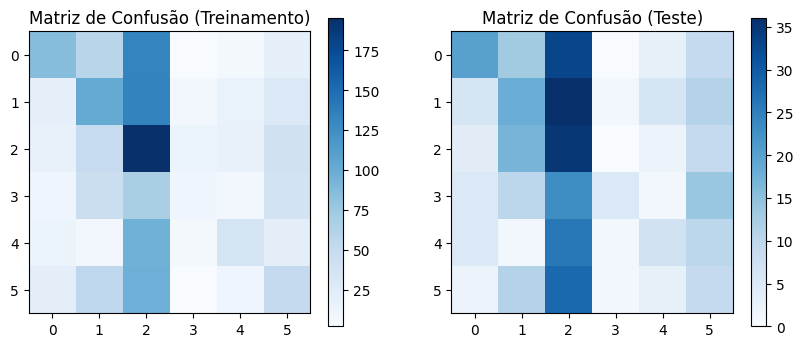

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Seus dados após PCA e K-means
X = dados_reduzidos
y = np.array([0] * len(polpa_prata) + [1] * len(polpa_maca) + [2] * len(polpa_nanica) +
             [3] * len(casca_prata) + [4] * len(casca_maca) + [5] * len(casca_nanica))

# Codificar rótulos de classe para números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Certifique-se de que X tenha o mesmo número de amostras que y
X = X[:len(y)]

# Dividir os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação da rede neural MLP
model = Sequential()
model.add(Dense(128, input_dim=n_componentes, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_treinamento, y_treinamento, epochs=100, batch_size=32, verbose=1)

# Teste do modelo
resultado_treinamento = model.predict(X_treinamento)
resultado_teste = model.predict(X_teste)

# Transforme os resultados em classes previstas
y_treinamento_previsto = np.argmax(resultado_treinamento, axis=1)
y_teste_previsto = np.argmax(resultado_teste, axis=1)

# Transforme as classes reais de volta para os rótulos originais
y_treinamento_real = np.argmax(y_treinamento, axis=1)
y_teste_real = np.argmax(y_teste, axis=1)

# Matriz de confusão para treinamento
matriz_confusao_treinamento = confusion_matrix(y_treinamento_real, y_treinamento_previsto)

# Matriz de confusão para teste
matriz_confusao_teste = confusion_matrix(y_teste_real, y_teste_previsto)

# Impressão das matrizes de confusão
print("Matriz de Confusão (Treinamento):")
print(matriz_confusao_treinamento)

print("Matriz de Confusão (Teste):")
print(matriz_confusao_teste)

# Visualização das matrizes de confusão
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(matriz_confusao_treinamento, cmap='Blues')
plt.title("Matriz de Confusão (Treinamento)")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(matriz_confusao_teste, cmap='Blues')
plt.title("Matriz de Confusão (Teste)")
plt.colorbar()

plt.show()


# teste somete MLP

## TESTE MLP

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalização dos dados
scaler = StandardScaler()
X_treinamento = scaler.fit_transform(X_treinamento)
X_teste = scaler.transform(X_teste)


Epoch 1/150
25/25 [==============================] - 2s 6ms/step - loss: 1.7864 - accuracy: 0.1939
Epoch 2/150
25/25 [==============================] - 0s 13ms/step - loss: 1.7644 - accuracy: 0.2290
Epoch 3/150
25/25 [==============================] - 0s 11ms/step - loss: 1.7685 - accuracy: 0.2381
Epoch 4/150
25/25 [==============================] - 0s 11ms/step - loss: 1.7684 - accuracy: 0.2303
Epoch 5/150
25/25 [==============================] - 0s 11ms/step - loss: 1.7663 - accuracy: 0.2349
Epoch 6/150
25/25 [==============================] - 0s 10ms/step - loss: 1.7557 - accuracy: 0.2544
Epoch 7/150
25/25 [==============================] - 0s 8ms/step - loss: 1.7498 - accuracy: 0.2394
Epoch 8/150
25/25 [==============================] - 0s 6ms/step - loss: 1.7543 - accuracy: 0.2277
Epoch 9/150
25/25 [==============================] - 0s 6ms/step - loss: 1.7430 - accuracy: 0.2563
Epoch 10/150
25/25 [==============================] - 0s 6ms/step - loss: 1.7404 - accuracy: 0.2681
Epoc

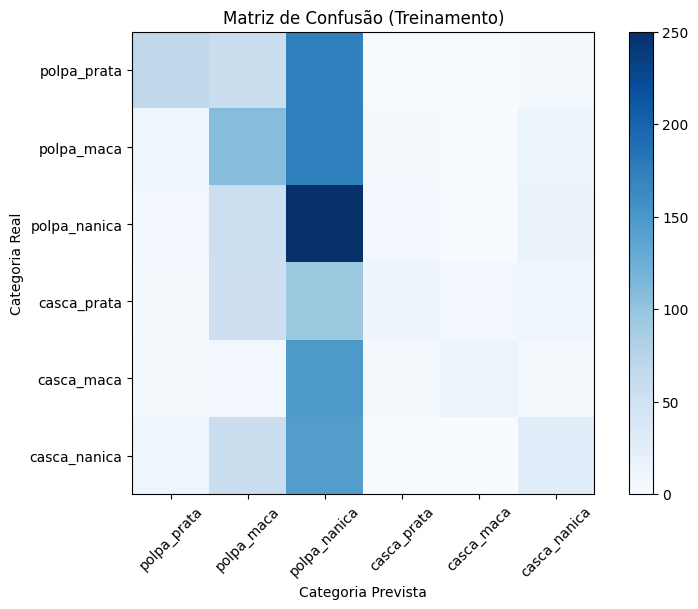

Relatório de Classificação (Treinamento):
              precision    recall  f1-score   support

 polpa_prata       0.67      0.23      0.34       302
  polpa_maca       0.33      0.35      0.34       307
polpa_nanica       0.26      0.75      0.38       333
 casca_prata       0.43      0.07      0.12       178
  casca_maca       0.65      0.07      0.13       181
casca_nanica       0.36      0.11      0.17       236

    accuracy                           0.31      1537
   macro avg       0.45      0.26      0.25      1537
weighted avg       0.43      0.31      0.27      1537



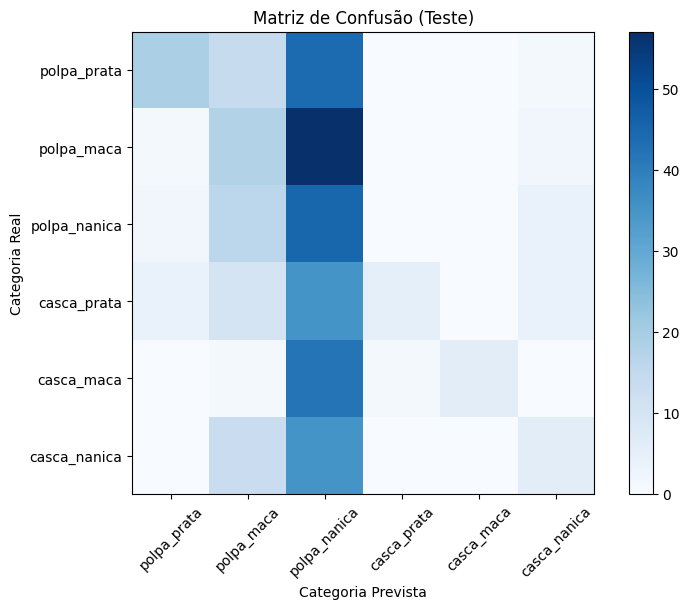

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

 polpa_prata       0.73      0.24      0.37        78
  polpa_maca       0.25      0.23      0.24        78
polpa_nanica       0.17      0.67      0.28        67
 casca_prata       0.83      0.09      0.16        58
  casca_maca       1.00      0.12      0.21        50
casca_nanica       0.35      0.11      0.17        54

    accuracy                           0.26       385
   macro avg       0.56      0.24      0.24       385
weighted avg       0.53      0.26      0.25       385

Conjunto de Treinamento:
True Positive (TP): 108
False Negative (FN): 10
False Positive (FP): 56
True Negative (TN): 1363

Conjunto de Teste:
True Positive (TP): 18
False Negative (FN): 1
False Positive (FP): 14
True Negative (TN): 352


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Defina os nomes das classes
nomes_classes = ["polpa_prata", "polpa_maca", "polpa_nanica", "casca_prata", "casca_maca", "casca_nanica"]

# Seus dados após PCA e K-means
X = dados_reduzidos
y = np.array([1] * len(polpa_prata) + [2] * len(polpa_maca) + [3] * len(polpa_nanica) +
             [1] * len(casca_prata) + [2] * len(casca_maca) + [3] * len(casca_nanica))

# Codificar rótulos de classe para números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Certifique-se de que X tenha o mesmo número de amostras que y
X = X[:len(y)]

# Dividir os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação da rede neural MLP
model = Sequential()
model.add(Dense(256, input_dim=n_componentes, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))


# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_treinamento, y_treinamento, epochs=150, batch_size=64, verbose=1)

# Teste do modelo
resultado_treinamento = model.predict(X_treinamento)
resultado_teste = model.predict(X_teste)

# Transforme os resultados em classes previstas
y_treinamento_previsto = np.argmax(resultado_treinamento, axis=1)
y_teste_previsto = np.argmax(resultado_teste, axis=1)

# Transforme as classes reais de volta para os rótulos originais
y_treinamento_real = np.argmax(y_treinamento, axis=1)
y_teste_real = np.argmax(y_teste, axis=1)

# Avaliar o modelo e obter as previsões
previsoes_treinamento = model.predict(X_treinamento)
previsoes_teste = model.predict(X_teste)

# Matriz de confusão e relatório de classificação para o conjunto de treinamento
matriz_confusao_treinamento = confusion_matrix(np.argmax(y_treinamento, axis=1), np.argmax(previsoes_treinamento, axis=1))
report_treinamento = classification_report(np.argmax(y_treinamento, axis=1), np.argmax(previsoes_treinamento, axis=1), target_names=nomes_classes)

plt.figure(figsize=(8, 6))
plt.imshow(matriz_confusao_treinamento, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão (Treinamento)")
plt.colorbar()
plt.xticks(np.arange(len(nomes_classes)), nomes_classes, rotation=45)
plt.yticks(np.arange(len(nomes_classes)), nomes_classes)
plt.tight_layout()
plt.ylabel("Categoria Real")
plt.xlabel("Categoria Prevista")
plt.show()

print("Relatório de Classificação (Treinamento):")
print(report_treinamento)

# Matriz de confusão e relatório de classificação para o conjunto de teste
matriz_confusao_teste = confusion_matrix(np.argmax(y_teste, axis=1), np.argmax(previsoes_teste, axis=1))
report_teste = classification_report(np.argmax(y_teste, axis=1), np.argmax(previsoes_teste, axis=1), target_names=nomes_classes)

plt.figure(figsize=(8, 6))
plt.imshow(matriz_confusao_teste, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão (Teste)")
plt.colorbar()
plt.xticks(np.arange(len(nomes_classes)), nomes_classes, rotation=45)
plt.yticks(np.arange(len(nomes_classes)), nomes_classes)
plt.tight_layout()
plt.ylabel("Categoria Real")
plt.xlabel("Categoria Prevista")
plt.show()

print("Relatório de Classificação (Teste):")
print(report_teste)



# Para o conjunto de treinamento
tp_treinamento = matriz_confusao_treinamento[1, 1]  # True Positive
fn_treinamento = matriz_confusao_treinamento[1, 0]  # False Negative
fp_treinamento = matriz_confusao_treinamento[0, 1]  # False Positive
tn_treinamento = np.sum(matriz_confusao_treinamento) - (tp_treinamento + fn_treinamento + fp_treinamento)  # True Negative

# Para o conjunto de teste
tp_teste = matriz_confusao_teste[1, 1]  # True Positive
fn_teste = matriz_confusao_teste[1, 0]  # False Negative
fp_teste = matriz_confusao_teste[0, 1]  # False Positive
tn_teste = np.sum(matriz_confusao_teste) - (tp_teste + fn_teste + fp_teste)  # True Negative

# Exibindo os resultados
print("Conjunto de Treinamento:")
print("True Positive (TP):", tp_treinamento)
print("False Negative (FN):", fn_treinamento)
print("False Positive (FP):", fp_treinamento)
print("True Negative (TN):", tn_treinamento)

print("\nConjunto de Teste:")
print("True Positive (TP):", tp_teste)
print("False Negative (FN):", fn_teste)
print("False Positive (FP):", fp_teste)
print("True Negative (TN):", tn_teste)


Epoch 1/150
25/25 [==============================] - 2s 6ms/step - loss: 1.8012 - accuracy: 0.1770
Epoch 2/150
25/25 [==============================] - 0s 6ms/step - loss: 1.7745 - accuracy: 0.2108
Epoch 3/150
25/25 [==============================] - 0s 7ms/step - loss: 1.7776 - accuracy: 0.2134
Epoch 4/150
25/25 [==============================] - 0s 6ms/step - loss: 1.7694 - accuracy: 0.2245
Epoch 5/150
25/25 [==============================] - 0s 6ms/step - loss: 1.7706 - accuracy: 0.2167
Epoch 6/150
25/25 [==============================] - 0s 5ms/step - loss: 1.7701 - accuracy: 0.2160
Epoch 7/150
25/25 [==============================] - 0s 6ms/step - loss: 1.7714 - accuracy: 0.2095
Epoch 8/150
25/25 [==============================] - 0s 5ms/step - loss: 1.7732 - accuracy: 0.2232
Epoch 9/150
25/25 [==============================] - 0s 6ms/step - loss: 1.7713 - accuracy: 0.2225
Epoch 10/150
25/25 [==============================] - 0s 5ms/step - loss: 1.7624 - accuracy: 0.2479
Epoch 11/

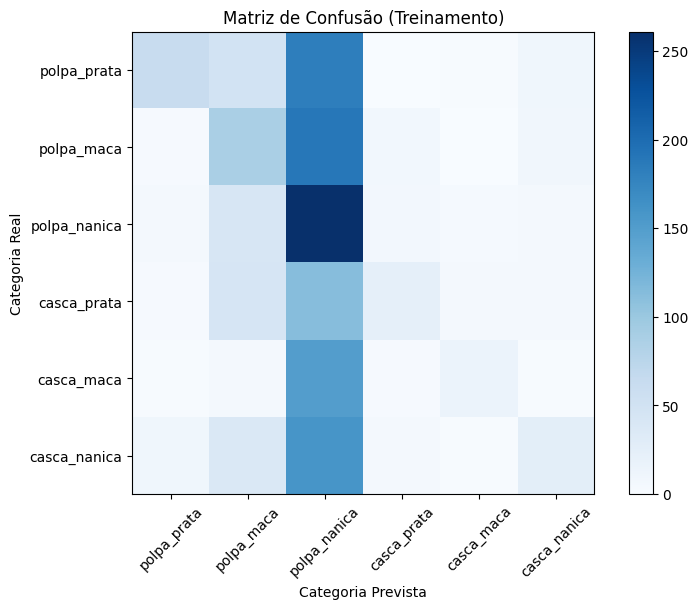

Relatório de Classificação (Treinamento):
              precision    recall  f1-score   support

 polpa_prata       0.72      0.20      0.32       305
  polpa_maca       0.33      0.30      0.31       297
polpa_nanica       0.25      0.80      0.38       325
 casca_prata       0.49      0.12      0.19       194
  casca_maca       0.53      0.09      0.15       177
casca_nanica       0.45      0.11      0.18       239

    accuracy                           0.31      1537
   macro avg       0.46      0.27      0.26      1537
weighted avg       0.45      0.31      0.27      1537



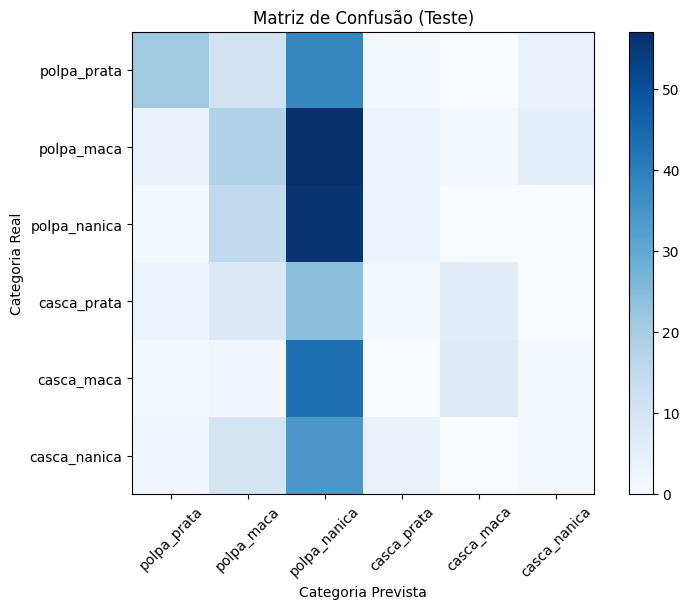

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

 polpa_prata       0.66      0.28      0.39        75
  polpa_maca       0.28      0.20      0.24        88
polpa_nanica       0.22      0.75      0.34        75
 casca_prata       0.08      0.02      0.04        42
  casca_maca       0.50      0.13      0.21        54
casca_nanica       0.09      0.02      0.03        51

    accuracy                           0.27       385
   macro avg       0.31      0.23      0.21       385
weighted avg       0.33      0.27      0.23       385

Conjunto de Treinamento:
True Positive (TP): 88
False Negative (FN): 3
False Positive (FP): 48
True Negative (TN): 1398

Conjunto de Teste:
True Positive (TP): 18
False Negative (FN): 4
False Positive (FP): 11
True Negative (TN): 352


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Defina os nomes das classes
nomes_classes = ["polpa_prata", "polpa_maca", "polpa_nanica", "casca_prata", "casca_maca", "casca_nanica"]

# Seus dados após PCA e K-means
X = dados_reduzidos
y = np.array([0] * len(polpa_prata) + [1] * len(polpa_maca) + [2] * len(polpa_nanica) +
             [3] * len(casca_prata) + [4] * len(casca_maca) + [5] * len(casca_nanica))

# Codificar rótulos de classe para números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Certifique-se de que X tenha o mesmo número de amostras que y
X = X[:len(y)]

# Dividir os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=56)

# Criação da rede neural MLP
model = Sequential()
model.add(Dense(256, input_dim=n_componentes, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(6, activation='softmax'))


# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_treinamento, y_treinamento, epochs=150, batch_size=64, verbose=1)

# Teste do modelo
resultado_treinamento = model.predict(X_treinamento)
resultado_teste = model.predict(X_teste)

# Transforme os resultados em classes previstas
y_treinamento_previsto = np.argmax(resultado_treinamento, axis=1)
y_teste_previsto = np.argmax(resultado_teste, axis=1)

# Transforme as classes reais de volta para os rótulos originais
y_treinamento_real = np.argmax(y_treinamento, axis=1)
y_teste_real = np.argmax(y_teste, axis=1)

# Avaliar o modelo e obter as previsões
previsoes_treinamento = model.predict(X_treinamento)
previsoes_teste = model.predict(X_teste)

# Matriz de confusão e relatório de classificação para o conjunto de treinamento
matriz_confusao_treinamento = confusion_matrix(np.argmax(y_treinamento, axis=1), np.argmax(previsoes_treinamento, axis=1))
report_treinamento = classification_report(np.argmax(y_treinamento, axis=1), np.argmax(previsoes_treinamento, axis=1), target_names=nomes_classes)

plt.figure(figsize=(8, 6))
plt.imshow(matriz_confusao_treinamento, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão (Treinamento)")
plt.colorbar()
plt.xticks(np.arange(len(nomes_classes)), nomes_classes, rotation=45)
plt.yticks(np.arange(len(nomes_classes)), nomes_classes)
plt.tight_layout()
plt.ylabel("Categoria Real")
plt.xlabel("Categoria Prevista")
plt.show()

print("Relatório de Classificação (Treinamento):")
print(report_treinamento)

# Matriz de confusão e relatório de classificação para o conjunto de teste
matriz_confusao_teste = confusion_matrix(np.argmax(y_teste, axis=1), np.argmax(previsoes_teste, axis=1))
report_teste = classification_report(np.argmax(y_teste, axis=1), np.argmax(previsoes_teste, axis=1), target_names=nomes_classes)

plt.figure(figsize=(8, 6))
plt.imshow(matriz_confusao_teste, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão (Teste)")
plt.colorbar()
plt.xticks(np.arange(len(nomes_classes)), nomes_classes, rotation=45)
plt.yticks(np.arange(len(nomes_classes)), nomes_classes)
plt.tight_layout()
plt.ylabel("Categoria Real")
plt.xlabel("Categoria Prevista")
plt.show()

print("Relatório de Classificação (Teste):")
print(report_teste)



# Para o conjunto de treinamento
tp_treinamento = matriz_confusao_treinamento[1, 1]  # True Positive
fn_treinamento = matriz_confusao_treinamento[1, 0]  # False Negative
fp_treinamento = matriz_confusao_treinamento[0, 1]  # False Positive
tn_treinamento = np.sum(matriz_confusao_treinamento) - (tp_treinamento + fn_treinamento + fp_treinamento)  # True Negative

# Para o conjunto de teste
tp_teste = matriz_confusao_teste[1, 1]  # True Positive
fn_teste = matriz_confusao_teste[1, 0]  # False Negative
fp_teste = matriz_confusao_teste[0, 1]  # False Positive
tn_teste = np.sum(matriz_confusao_teste) - (tp_teste + fn_teste + fp_teste)  # True Negative

# Exibindo os resultados
print("Conjunto de Treinamento:")
print("True Positive (TP):", tp_treinamento)
print("False Negative (FN):", fn_treinamento)
print("False Positive (FP):", fp_treinamento)
print("True Negative (TN):", tn_treinamento)

print("\nConjunto de Teste:")
print("True Positive (TP):", tp_teste)
print("False Negative (FN):", fn_teste)
print("False Positive (FP):", fp_teste)
print("True Negative (TN):", tn_teste)


Epoch 1/150
25/25 [==============================] - 1s 4ms/step - loss: 1.7851 - accuracy: 0.2030
Epoch 2/150
25/25 [==============================] - 0s 4ms/step - loss: 1.7761 - accuracy: 0.2154
Epoch 3/150
25/25 [==============================] - 0s 4ms/step - loss: 1.7679 - accuracy: 0.2212
Epoch 4/150
25/25 [==============================] - 0s 4ms/step - loss: 1.7708 - accuracy: 0.2310
Epoch 5/150
25/25 [==============================] - 0s 4ms/step - loss: 1.7673 - accuracy: 0.2342
Epoch 6/150
25/25 [==============================] - 0s 4ms/step - loss: 1.7569 - accuracy: 0.2433
Epoch 7/150
25/25 [==============================] - 0s 5ms/step - loss: 1.7605 - accuracy: 0.2414
Epoch 8/150
25/25 [==============================] - 0s 4ms/step - loss: 1.7547 - accuracy: 0.2336
Epoch 9/150
25/25 [==============================] - 0s 4ms/step - loss: 1.7530 - accuracy: 0.2446
Epoch 10/150
25/25 [==============================] - 0s 4ms/step - loss: 1.7437 - accuracy: 0.2427
Epoch 11/

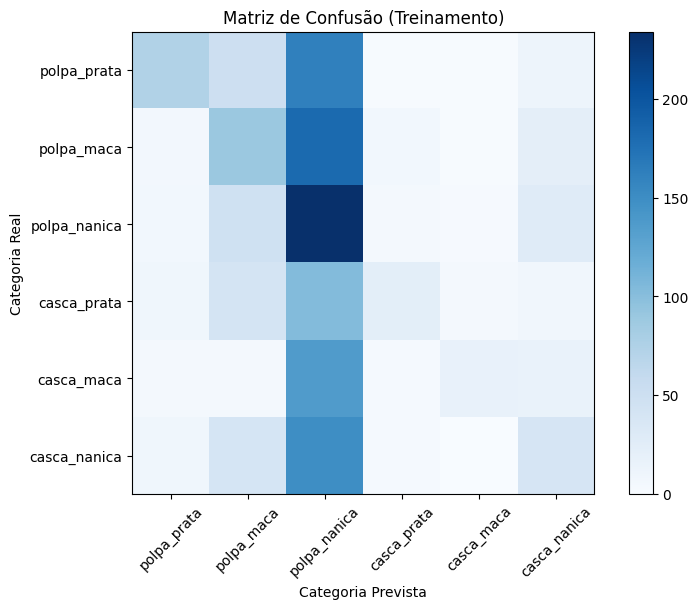

Relatório de Classificação (Treinamento):
              precision    recall  f1-score   support

 polpa_prata       0.68      0.25      0.36       298
  polpa_maca       0.33      0.29      0.31       306
polpa_nanica       0.24      0.73      0.36       322
 casca_prata       0.56      0.12      0.20       189
  casca_maca       0.67      0.10      0.17       182
casca_nanica       0.31      0.16      0.21       240

    accuracy                           0.31      1537
   macro avg       0.47      0.27      0.27      1537
weighted avg       0.44      0.31      0.29      1537



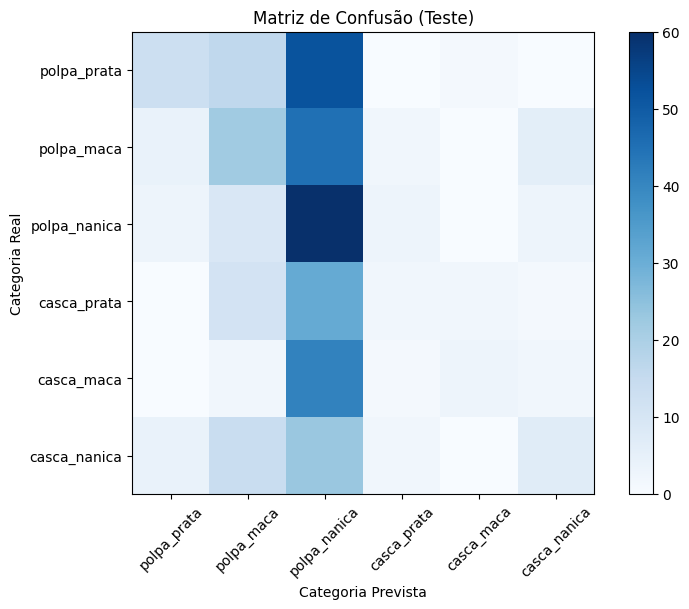

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

 polpa_prata       0.54      0.16      0.25        82
  polpa_maca       0.30      0.28      0.29        79
polpa_nanica       0.24      0.77      0.36        78
 casca_prata       0.20      0.04      0.07        47
  casca_maca       0.50      0.06      0.11        49
casca_nanica       0.37      0.14      0.20        50

    accuracy                           0.28       385
   macro avg       0.36      0.24      0.21       385
weighted avg       0.36      0.28      0.23       385

Conjunto de Treinamento:
True Positive (TP): 89
False Negative (FN): 6
False Positive (FP): 50
True Negative (TN): 1392

Conjunto de Teste:
True Positive (TP): 22
False Negative (FN): 4
False Positive (FP): 16
True Negative (TN): 343


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Defina os nomes das classes
nomes_classes = ["polpa_prata", "polpa_maca", "polpa_nanica", "casca_prata", "casca_maca", "casca_nanica"]

# Seus dados após PCA e K-means
X = dados_reduzidos
y = np.array([0] * len(polpa_prata) + [1] * len(polpa_maca) + [2] * len(polpa_nanica) +
             [3] * len(casca_prata) + [4] * len(casca_maca) + [5] * len(casca_nanica))

# Codificar rótulos de classe para números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Certifique-se de que X tenha o mesmo número de amostras que y
X = X[:len(y)]

# Dividir os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=72)

# Criação da rede neural MLP
model = Sequential()
model.add(Dense(256, input_dim=n_componentes, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))


# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_treinamento, y_treinamento, epochs=150, batch_size=64, verbose=1)

# Teste do modelo
resultado_treinamento = model.predict(X_treinamento)
resultado_teste = model.predict(X_teste)

# Transforme os resultados em classes previstas
y_treinamento_previsto = np.argmax(resultado_treinamento, axis=1)
y_teste_previsto = np.argmax(resultado_teste, axis=1)

# Transforme as classes reais de volta para os rótulos originais
y_treinamento_real = np.argmax(y_treinamento, axis=1)
y_teste_real = np.argmax(y_teste, axis=1)

# Avaliar o modelo e obter as previsões
previsoes_treinamento = model.predict(X_treinamento)
previsoes_teste = model.predict(X_teste)

# Matriz de confusão e relatório de classificação para o conjunto de treinamento
matriz_confusao_treinamento = confusion_matrix(np.argmax(y_treinamento, axis=1), np.argmax(previsoes_treinamento, axis=1))
report_treinamento = classification_report(np.argmax(y_treinamento, axis=1), np.argmax(previsoes_treinamento, axis=1), target_names=nomes_classes)

plt.figure(figsize=(8, 6))
plt.imshow(matriz_confusao_treinamento, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão (Treinamento)")
plt.colorbar()
plt.xticks(np.arange(len(nomes_classes)), nomes_classes, rotation=45)
plt.yticks(np.arange(len(nomes_classes)), nomes_classes)
plt.tight_layout()
plt.ylabel("Categoria Real")
plt.xlabel("Categoria Prevista")
plt.show()

print("Relatório de Classificação (Treinamento):")
print(report_treinamento)

# Matriz de confusão e relatório de classificação para o conjunto de teste
matriz_confusao_teste = confusion_matrix(np.argmax(y_teste, axis=1), np.argmax(previsoes_teste, axis=1))
report_teste = classification_report(np.argmax(y_teste, axis=1), np.argmax(previsoes_teste, axis=1), target_names=nomes_classes)

plt.figure(figsize=(8, 6))
plt.imshow(matriz_confusao_teste, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão (Teste)")
plt.colorbar()
plt.xticks(np.arange(len(nomes_classes)), nomes_classes, rotation=45)
plt.yticks(np.arange(len(nomes_classes)), nomes_classes)
plt.tight_layout()
plt.ylabel("Categoria Real")
plt.xlabel("Categoria Prevista")
plt.show()

print("Relatório de Classificação (Teste):")
print(report_teste)

# Para o conjunto de treinamento
tp_treinamento = matriz_confusao_treinamento[1, 1]  # True Positive
fn_treinamento = matriz_confusao_treinamento[1, 0]  # False Negative
fp_treinamento = matriz_confusao_treinamento[0, 1]  # False Positive
tn_treinamento = np.sum(matriz_confusao_treinamento) - (tp_treinamento + fn_treinamento + fp_treinamento)  # True Negative

# Para o conjunto de teste
tp_teste = matriz_confusao_teste[1, 1]  # True Positive
fn_teste = matriz_confusao_teste[1, 0]  # False Negative
fp_teste = matriz_confusao_teste[0, 1]  # False Positive
tn_teste = np.sum(matriz_confusao_teste) - (tp_teste + fn_teste + fp_teste)  # True Negative

# Exibindo os resultados
print("Conjunto de Treinamento:")
print("True Positive (TP):", tp_treinamento)
print("False Negative (FN):", fn_treinamento)
print("False Positive (FP):", fp_treinamento)
print("True Negative (TN):", tn_treinamento)

print("\nConjunto de Teste:")
print("True Positive (TP):", tp_teste)
print("False Negative (FN):", fn_teste)
print("False Positive (FP):", fp_teste)
print("True Negative (TN):", tn_teste)


Epoch 1/150
16/16 [==============================] - 3s 17ms/step - loss: 1.7783 - accuracy: 0.2225
Epoch 2/150
16/16 [==============================] - 0s 19ms/step - loss: 1.7656 - accuracy: 0.2303
Epoch 3/150
16/16 [==============================] - 0s 22ms/step - loss: 1.7663 - accuracy: 0.2245
Epoch 4/150
16/16 [==============================] - 0s 21ms/step - loss: 1.7626 - accuracy: 0.2394
Epoch 5/150
16/16 [==============================] - 0s 24ms/step - loss: 1.7541 - accuracy: 0.2485
Epoch 6/150
16/16 [==============================] - 0s 22ms/step - loss: 1.7544 - accuracy: 0.2492
Epoch 7/150
16/16 [==============================] - 0s 26ms/step - loss: 1.7402 - accuracy: 0.2615
Epoch 8/150
16/16 [==============================] - 0s 24ms/step - loss: 1.7246 - accuracy: 0.2668
Epoch 9/150
16/16 [==============================] - 0s 18ms/step - loss: 1.7142 - accuracy: 0.2713
Epoch 10/150
16/16 [==============================] - 0s 13ms/step - loss: 1.7049 - accuracy: 0.2694

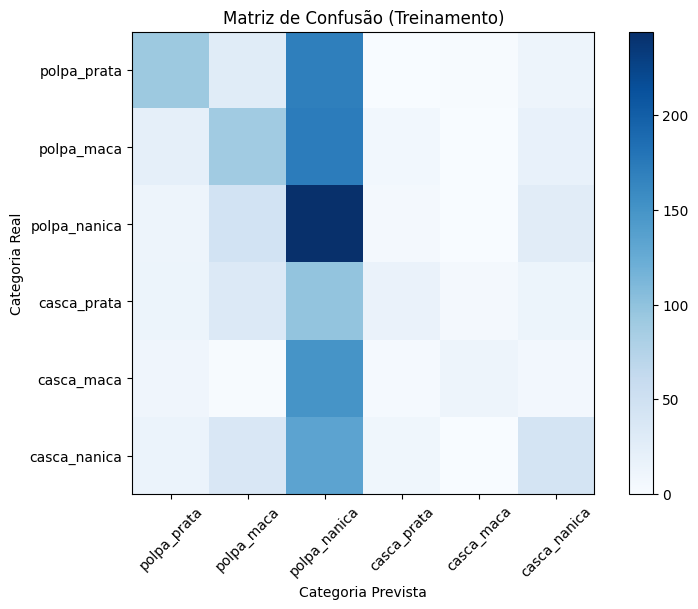

Relatório de Classificação (Treinamento):
              precision    recall  f1-score   support

 polpa_prata       0.56      0.30      0.40       302
  polpa_maca       0.38      0.29      0.33       307
polpa_nanica       0.25      0.73      0.38       333
 casca_prata       0.40      0.09      0.15       178
  casca_maca       0.67      0.07      0.12       181
casca_nanica       0.36      0.18      0.24       236

    accuracy                           0.32      1537
   macro avg       0.44      0.28      0.27      1537
weighted avg       0.42      0.32      0.29      1537



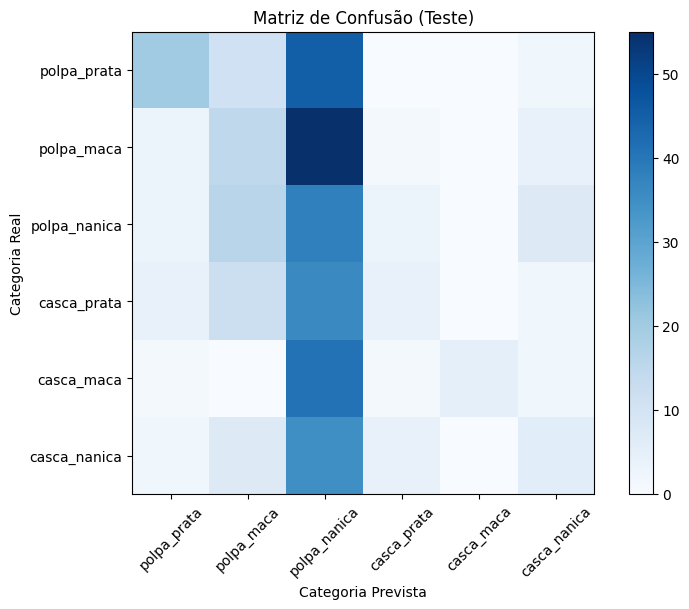

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

 polpa_prata       0.61      0.26      0.36        78
  polpa_maca       0.25      0.19      0.22        78
polpa_nanica       0.15      0.57      0.24        67
 casca_prata       0.31      0.07      0.11        58
  casca_maca       1.00      0.10      0.18        50
casca_nanica       0.26      0.11      0.16        54

    accuracy                           0.23       385
   macro avg       0.43      0.22      0.21       385
weighted avg       0.41      0.23      0.22       385

Conjunto de Treinamento:
True Positive (TP): 89
False Negative (FN): 21
False Positive (FP): 28
True Negative (TN): 1399

Conjunto de Teste:
True Positive (TP): 15
False Negative (FN): 3
False Positive (FP): 11
True Negative (TN): 356


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Defina os nomes das classes
nomes_classes = ["polpa_prata", "polpa_maca", "polpa_nanica", "casca_prata", "casca_maca", "casca_nanica"]

# Seus dados após PCA e K-means
X = dados_reduzidos
y = np.array([0] * len(polpa_prata) + [1] * len(polpa_maca) + [2] * len(polpa_nanica) +
             [3] * len(casca_prata) + [4] * len(casca_maca) + [5] * len(casca_nanica))

# Codificar rótulos de classe para números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Certifique-se de que X tenha o mesmo número de amostras que y
X = X[:len(y)]

# Dividir os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação da rede neural MLP
model = Sequential()
model.add(Dense(1000, input_dim=n_componentes, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(346, activation='relu'))
model.add(Dense(242, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))


# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_treinamento, y_treinamento, epochs=150, batch_size=100, verbose=1)

# Teste do modelo
resultado_treinamento = model.predict(X_treinamento)
resultado_teste = model.predict(X_teste)

# Transforme os resultados em classes previstas
y_treinamento_previsto = np.argmax(resultado_treinamento, axis=1)
y_teste_previsto = np.argmax(resultado_teste, axis=1)

# Transforme as classes reais de volta para os rótulos originais
y_treinamento_real = np.argmax(y_treinamento, axis=1)
y_teste_real = np.argmax(y_teste, axis=1)

# Avaliar o modelo e obter as previsões
previsoes_treinamento = model.predict(X_treinamento)
previsoes_teste = model.predict(X_teste)

# Matriz de confusão e relatório de classificação para o conjunto de treinamento
matriz_confusao_treinamento = confusion_matrix(np.argmax(y_treinamento, axis=1), np.argmax(previsoes_treinamento, axis=1))
report_treinamento = classification_report(np.argmax(y_treinamento, axis=1), np.argmax(previsoes_treinamento, axis=1), target_names=nomes_classes)

plt.figure(figsize=(8, 6))
plt.imshow(matriz_confusao_treinamento, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão (Treinamento)")
plt.colorbar()
plt.xticks(np.arange(len(nomes_classes)), nomes_classes, rotation=45)
plt.yticks(np.arange(len(nomes_classes)), nomes_classes)
plt.tight_layout()
plt.ylabel("Categoria Real")
plt.xlabel("Categoria Prevista")
plt.show()

print("Relatório de Classificação (Treinamento):")
print(report_treinamento)

# Matriz de confusão e relatório de classificação para o conjunto de teste
matriz_confusao_teste = confusion_matrix(np.argmax(y_teste, axis=1), np.argmax(previsoes_teste, axis=1))
report_teste = classification_report(np.argmax(y_teste, axis=1), np.argmax(previsoes_teste, axis=1), target_names=nomes_classes)

plt.figure(figsize=(8, 6))
plt.imshow(matriz_confusao_teste, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão (Teste)")
plt.colorbar()
plt.xticks(np.arange(len(nomes_classes)), nomes_classes, rotation=45)
plt.yticks(np.arange(len(nomes_classes)), nomes_classes)
plt.tight_layout()
plt.ylabel("Categoria Real")
plt.xlabel("Categoria Prevista")
plt.show()

print("Relatório de Classificação (Teste):")
print(report_teste)



# Para o conjunto de treinamento
tp_treinamento = matriz_confusao_treinamento[1, 1]  # True Positive
fn_treinamento = matriz_confusao_treinamento[1, 0]  # False Negative
fp_treinamento = matriz_confusao_treinamento[0, 1]  # False Positive
tn_treinamento = np.sum(matriz_confusao_treinamento) - (tp_treinamento + fn_treinamento + fp_treinamento)  # True Negative

# Para o conjunto de teste
tp_teste = matriz_confusao_teste[1, 1]  # True Positive
fn_teste = matriz_confusao_teste[1, 0]  # False Negative
fp_teste = matriz_confusao_teste[0, 1]  # False Positive
tn_teste = np.sum(matriz_confusao_teste) - (tp_teste + fn_teste + fp_teste)  # True Negative

# Exibindo os resultados
print("Conjunto de Treinamento:")
print("True Positive (TP):", tp_treinamento)
print("False Negative (FN):", fn_treinamento)
print("False Positive (FP):", fp_treinamento)
print("True Negative (TN):", tn_treinamento)

print("\nConjunto de Teste:")
print("True Positive (TP):", tp_teste)
print("False Negative (FN):", fn_teste)
print("False Positive (FP):", fp_teste)
print("True Negative (TN):", tn_teste)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

# Seus dados após PCA e K-means
X = dados_reduzidos
y = np.array([0] * len(polpa_prata) + [1] * len(polpa_maca) + [2] * len(polpa_nanica) +
             [3] * len(casca_prata) + [4] * len(casca_maca) + [5] * len(casca_nanica))

# Codificar rótulos de classe para números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Certifique-se de que X tenha o mesmo número de amostras que y
X = X[:len(y)]

# Dividir os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)

# Criação da rede neural MLP
model = Sequential()
model.add(Dense(500, input_dim=n_componentes, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_treinamento, y_treinamento, epochs=100, batch_size=32, verbose=1)

# Teste do modelo
resultado_treinamento = model.predict(X_treinamento)
resultado_teste = model.predict(X_teste)

# Transforme os resultados em classes previstas
y_treinamento_previsto = np.argmax(resultado_treinamento, axis=1)
y_teste_previsto = np.argmax(resultado_teste, axis=1)

# Transforme as classes reais de volta para os rótulos originais
y_treinamento_real = np.argmax(y_treinamento, axis=1)
y_teste_real = np.argmax(y_teste, axis=1)

# Calcula a acurácia para treinamento
accuracy_treinamento = tf.keras.metrics.Accuracy()
accuracy_treinamento.update_state(y_treinamento_real, y_treinamento_previsto)
acuracia_treinamento_resultado = accuracy_treinamento.result().numpy()

# Calcula a acurácia para teste
accuracy_teste = tf.keras.metrics.Accuracy()
accuracy_teste.update_state(y_teste_real, y_teste_previsto)
acuracia_teste_resultado = accuracy_teste.result().numpy()

print("Acurácia (Treinamento):", acuracia_treinamento_resultado)
print("Acurácia (Teste):", acuracia_teste_resultado)

Epoch 1/100
49/49 [==============================] - 1s 6ms/step - loss: 1.7935 - accuracy: 0.2108
Epoch 2/100
49/49 [==============================] - 0s 5ms/step - loss: 1.7737 - accuracy: 0.2167
Epoch 3/100
49/49 [==============================] - 0s 5ms/step - loss: 1.7483 - accuracy: 0.2485
Epoch 4/100
49/49 [==============================] - 0s 8ms/step - loss: 1.7195 - accuracy: 0.2589
Epoch 5/100
49/49 [==============================] - 0s 8ms/step - loss: 1.7128 - accuracy: 0.2550
Epoch 6/100
49/49 [==============================] - 0s 9ms/step - loss: 1.6969 - accuracy: 0.2524
Epoch 7/100
49/49 [==============================] - 0s 8ms/step - loss: 1.6910 - accuracy: 0.2642
Epoch 8/100
49/49 [==============================] - 0s 8ms/step - loss: 1.6778 - accuracy: 0.2622
Epoch 9/100
49/49 [==============================] - 0s 8ms/step - loss: 1.6854 - accuracy: 0.2648
Epoch 10/100
49/49 [==============================] - 0s 9ms/step - loss: 1.6704 - accuracy: 0.2804
Epoch 11/

## teste 1

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

# Seus dados após PCA e K-means
X = dados_reduzidos
y = np.array([0] * len(polpa_prata) + [1] * len(polpa_maca) + [2] * len(polpa_nanica) +
             [3] * len(casca_prata) + [4] * len(casca_maca) + [5] * len(casca_nanica))

# Codificar rótulos de classe para números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Certifique-se de que X tenha o mesmo número de amostras que y
X = X[:len(y)]

# Dividir os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)

# Criação da rede neural MLP
model = Sequential()
model.add(Dense(500, input_dim=n_componentes, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_treinamento, y_treinamento, epochs=100, batch_size=32, verbose=1)

# Teste do modelo
resultado_treinamento = model.predict(X_treinamento)
resultado_teste = model.predict(X_teste)

# Transforme os resultados em classes previstas
y_treinamento_previsto = np.argmax(resultado_treinamento, axis=1)
y_teste_previsto = np.argmax(resultado_teste, axis=1)

# Transforme as classes reais de volta para os rótulos originais
y_treinamento_real = np.argmax(y_treinamento, axis=1)
y_teste_real = np.argmax(y_teste, axis=1)

# Calcula a acurácia para treinamento
accuracy_treinamento = tf.keras.metrics.Accuracy()
accuracy_treinamento.update_state(y_treinamento_real, y_treinamento_previsto)
acuracia_treinamento_resultado = accuracy_treinamento.result().numpy()

# Calcula a acurácia para teste
accuracy_teste = tf.keras.metrics.Accuracy()
accuracy_teste.update_state(y_teste_real, y_teste_previsto)
acuracia_teste_resultado = accuracy_teste.result().numpy()

print("Acurácia (Treinamento):", acuracia_treinamento_resultado)
print("Acurácia (Teste):", acuracia_teste_resultado)

Epoch 1/100
49/49 [==============================] - 1s 5ms/step - loss: 1.7835 - accuracy: 0.2147
Epoch 2/100
49/49 [==============================] - 0s 5ms/step - loss: 1.7619 - accuracy: 0.2407
Epoch 3/100
49/49 [==============================] - 0s 5ms/step - loss: 1.7488 - accuracy: 0.2609
Epoch 4/100
49/49 [==============================] - 0s 5ms/step - loss: 1.7207 - accuracy: 0.2518
Epoch 5/100
49/49 [==============================] - 0s 5ms/step - loss: 1.6993 - accuracy: 0.2596
Epoch 6/100
49/49 [==============================] - 0s 5ms/step - loss: 1.7448 - accuracy: 0.2472
Epoch 7/100
49/49 [==============================] - 0s 5ms/step - loss: 1.6912 - accuracy: 0.2830
Epoch 8/100
49/49 [==============================] - 0s 6ms/step - loss: 1.6851 - accuracy: 0.2681
Epoch 9/100
49/49 [==============================] - 0s 5ms/step - loss: 1.6807 - accuracy: 0.2589
Epoch 10/100
49/49 [==============================] - 0s 5ms/step - loss: 1.6758 - accuracy: 0.2635
Epoch 11/

## teste 2

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

# Seus dados após PCA e K-means
X = dados_reduzidos
y = np.array([0] * len(polpa_prata) + [1] * len(polpa_maca) + [2] * len(polpa_nanica) +
             [3] * len(casca_prata) + [4] * len(casca_maca) + [5] * len(casca_nanica))

# Codificar rótulos de classe para números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Certifique-se de que X tenha o mesmo número de amostras que y
X = X[:len(y)]

# Dividir os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)

# Criação da rede neural MLP
model = Sequential()
model.add(Dense(500, input_dim=n_componentes, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_treinamento, y_treinamento, epochs=200, batch_size=32, verbose=1)

# Teste do modelo
resultado_treinamento = model.predict(X_treinamento)
resultado_teste = model.predict(X_teste)

# Transforme os resultados em classes previstas
y_treinamento_previsto = np.argmax(resultado_treinamento, axis=1)
y_teste_previsto = np.argmax(resultado_teste, axis=1)

# Transforme as classes reais de volta para os rótulos originais
y_treinamento_real = np.argmax(y_treinamento, axis=1)
y_teste_real = np.argmax(y_teste, axis=1)

# Calcula a acurácia para treinamento
accuracy_treinamento = tf.keras.metrics.Accuracy()
accuracy_treinamento.update_state(y_treinamento_real, y_treinamento_previsto)
acuracia_treinamento_resultado = accuracy_treinamento.result().numpy()

# Calcula a acurácia para teste
accuracy_teste = tf.keras.metrics.Accuracy()
accuracy_teste.update_state(y_teste_real, y_teste_previsto)
acuracia_teste_resultado = accuracy_teste.result().numpy()

print("Acurácia (Treinamento):", acuracia_treinamento_resultado)
print("Acurácia (Teste):", acuracia_teste_resultado)

Epoch 1/200
49/49 [==============================] - 4s 10ms/step - loss: 1.7811 - accuracy: 0.2004
Epoch 2/200
49/49 [==============================] - 0s 7ms/step - loss: 1.7635 - accuracy: 0.2381
Epoch 3/200
49/49 [==============================] - 0s 8ms/step - loss: 1.7348 - accuracy: 0.2739
Epoch 4/200
49/49 [==============================] - 0s 9ms/step - loss: 1.7305 - accuracy: 0.2433
Epoch 5/200
49/49 [==============================] - 0s 9ms/step - loss: 1.7091 - accuracy: 0.2668
Epoch 6/200
49/49 [==============================] - 0s 9ms/step - loss: 1.6965 - accuracy: 0.2772
Epoch 7/200
49/49 [==============================] - 0s 9ms/step - loss: 1.6910 - accuracy: 0.2655
Epoch 8/200
49/49 [==============================] - 0s 6ms/step - loss: 1.6783 - accuracy: 0.2713
Epoch 9/200
49/49 [==============================] - 0s 5ms/step - loss: 1.6805 - accuracy: 0.2661
Epoch 10/200
49/49 [==============================] - 0s 5ms/step - loss: 1.6716 - accuracy: 0.2746
Epoch 11

## teste 3

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

# Seus dados após PCA e K-means
X = dados_reduzidos
y = np.array([0] * len(polpa_prata) + [1] * len(polpa_maca) + [2] * len(polpa_nanica) +
             [3] * len(casca_prata) + [4] * len(casca_maca) + [5] * len(casca_nanica))

# Codificar rótulos de classe para números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Certifique-se de que X tenha o mesmo número de amostras que y
X = X[:len(y)]

# Dividir os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)

# Criação da rede neural MLP
model = Sequential()
model.add(Dense(500, input_dim=n_componentes, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_treinamento, y_treinamento, epochs=200, batch_size=85, verbose=1)

# Teste do modelo
resultado_treinamento = model.predict(X_treinamento)
resultado_teste = model.predict(X_teste)

# Transforme os resultados em classes previstas
y_treinamento_previsto = np.argmax(resultado_treinamento, axis=1)
y_teste_previsto = np.argmax(resultado_teste, axis=1)

# Transforme as classes reais de volta para os rótulos originais
y_treinamento_real = np.argmax(y_treinamento, axis=1)
y_teste_real = np.argmax(y_teste, axis=1)

# Calcula a acurácia para treinamento
accuracy_treinamento = tf.keras.metrics.Accuracy()
accuracy_treinamento.update_state(y_treinamento_real, y_treinamento_previsto)
acuracia_treinamento_resultado = accuracy_treinamento.result().numpy()

# Calcula a acurácia para teste
accuracy_teste = tf.keras.metrics.Accuracy()
accuracy_teste.update_state(y_teste_real, y_teste_previsto)
acuracia_teste_resultado = accuracy_teste.result().numpy()

print("Acurácia (Treinamento):", acuracia_treinamento_resultado)
print("Acurácia (Teste):", acuracia_teste_resultado)

Epoch 1/200
19/19 [==============================] - 2s 11ms/step - loss: 1.7786 - accuracy: 0.2160
Epoch 2/200
19/19 [==============================] - 0s 10ms/step - loss: 1.7646 - accuracy: 0.2310
Epoch 3/200
19/19 [==============================] - 0s 13ms/step - loss: 1.7565 - accuracy: 0.2420
Epoch 4/200
19/19 [==============================] - 0s 12ms/step - loss: 1.7485 - accuracy: 0.2329
Epoch 5/200
19/19 [==============================] - 0s 12ms/step - loss: 1.7314 - accuracy: 0.2537
Epoch 6/200
19/19 [==============================] - 0s 9ms/step - loss: 1.7292 - accuracy: 0.2479
Epoch 7/200
19/19 [==============================] - 0s 8ms/step - loss: 1.6995 - accuracy: 0.2804
Epoch 8/200
19/19 [==============================] - 0s 10ms/step - loss: 1.6941 - accuracy: 0.2700
Epoch 9/200
19/19 [==============================] - 0s 11ms/step - loss: 1.6903 - accuracy: 0.2602
Epoch 10/200
19/19 [==============================] - 0s 10ms/step - loss: 1.6821 - accuracy: 0.2752
E

## teste 4

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

# Seus dados após PCA e K-means
X = dados_reduzidos
y = np.array([0] * len(polpa_prata) + [1] * len(polpa_maca) + [2] * len(polpa_nanica) +
             [3] * len(casca_prata) + [4] * len(casca_maca) + [5] * len(casca_nanica))

# Codificar rótulos de classe para números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Certifique-se de que X tenha o mesmo número de amostras que y
X = X[:len(y)]

# Dividir os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)

# Criação da rede neural MLP
model = Sequential()
model.add(Dense(500, input_dim=n_componentes, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_treinamento, y_treinamento, epochs=300, batch_size=246, verbose=True)

# Teste do modelo
resultado_treinamento = model.predict(X_treinamento)
resultado_teste = model.predict(X_teste)

# Transforme os resultados em classes previstas
y_treinamento_previsto = np.argmax(resultado_treinamento, axis=1)
y_teste_previsto = np.argmax(resultado_teste, axis=1)

# Transforme as classes reais de volta para os rótulos originais
y_treinamento_real = np.argmax(y_treinamento, axis=1)
y_teste_real = np.argmax(y_teste, axis=1)

# Calcula a acurácia para treinamento
accuracy_treinamento = tf.keras.metrics.Accuracy()
accuracy_treinamento.update_state(y_treinamento_real, y_treinamento_previsto)
acuracia_treinamento_resultado = accuracy_treinamento.result().numpy()

# Calcula a acurácia para teste
accuracy_teste = tf.keras.metrics.Accuracy()
accuracy_teste.update_state(y_teste_real, y_teste_previsto)
acuracia_teste_resultado = accuracy_teste.result().numpy()

print("Acurácia (Treinamento):", acuracia_treinamento_resultado)
print("Acurácia (Teste):", acuracia_teste_resultado)

Epoch 1/300
7/7 [==============================] - 3s 14ms/step - loss: 1.7923 - accuracy: 0.2062
Epoch 2/300
7/7 [==============================] - 0s 20ms/step - loss: 1.7672 - accuracy: 0.2238
Epoch 3/300
7/7 [==============================] - 0s 23ms/step - loss: 1.7616 - accuracy: 0.2297
Epoch 4/300
7/7 [==============================] - 0s 21ms/step - loss: 1.7546 - accuracy: 0.2329
Epoch 5/300
7/7 [==============================] - 0s 19ms/step - loss: 1.7464 - accuracy: 0.2401
Epoch 6/300
7/7 [==============================] - 0s 21ms/step - loss: 1.7466 - accuracy: 0.2479
Epoch 7/300
7/7 [==============================] - 0s 22ms/step - loss: 1.7376 - accuracy: 0.2524
Epoch 8/300
7/7 [==============================] - 0s 23ms/step - loss: 1.7329 - accuracy: 0.2498
Epoch 9/300
7/7 [==============================] - 0s 29ms/step - loss: 1.7264 - accuracy: 0.2563
Epoch 10/300
7/7 [==============================] - 0s 24ms/step - loss: 1.7116 - accuracy: 0.2713
Epoch 11/300
7/7 [=

In [ ]:
print(len(X))

1922


## teste 5

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

# Seus dados após PCA e K-means
X = dados_reduzidos
y = np.array([0] * len(polpa_prata) + [1] * len(polpa_maca) + [2] * len(polpa_nanica) +
             [3] * len(casca_prata) + [4] * len(casca_maca) + [5] * len(casca_nanica))

# Codificar rótulos de classe para números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Certifique-se de que X tenha o mesmo número de amostras que y
X = X[:len(y)]

# Dividir os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)

# Criação da rede neural MLP
model = Sequential()
model.add(Dense(1900, input_dim=n_componentes, activation='relu'))
model.add(Dense(564, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(42, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_treinamento, y_treinamento, epochs=1000, batch_size=246, verbose=True)

# Teste do modelo
resultado_treinamento = model.predict(X_treinamento)
resultado_teste = model.predict(X_teste)

# Transforme os resultados em classes previstas
y_treinamento_previsto = np.argmax(resultado_treinamento, axis=1)
y_teste_previsto = np.argmax(resultado_teste, axis=1)

# Transforme as classes reais de volta para os rótulos originais
y_treinamento_real = np.argmax(y_treinamento, axis=1)
y_teste_real = np.argmax(y_teste, axis=1)

# Calcula a acurácia para treinamento
accuracy_treinamento = tf.keras.metrics.Accuracy()
accuracy_treinamento.update_state(y_treinamento_real, y_treinamento_previsto)
acuracia_treinamento_resultado = accuracy_treinamento.result().numpy()

# Calcula a acurácia para teste
accuracy_teste = tf.keras.metrics.Accuracy()
accuracy_teste.update_state(y_teste_real, y_teste_previsto)
acuracia_teste_resultado = accuracy_teste.result().numpy()

print("Acurácia (Treinamento):", acuracia_treinamento_resultado)
print("Acurácia (Teste):", acuracia_teste_resultado)

Epoch 1/1000
7/7 [==============================] - 4s 105ms/step - loss: 1.7923 - accuracy: 0.1939
Epoch 2/1000
7/7 [==============================] - 1s 104ms/step - loss: 1.7784 - accuracy: 0.2082
Epoch 3/1000
7/7 [==============================] - 1s 99ms/step - loss: 1.7716 - accuracy: 0.2264
Epoch 4/1000
7/7 [==============================] - 1s 105ms/step - loss: 1.7655 - accuracy: 0.2219
Epoch 5/1000
7/7 [==============================] - 0s 70ms/step - loss: 1.7488 - accuracy: 0.2485
Epoch 6/1000
7/7 [==============================] - 1s 86ms/step - loss: 1.7395 - accuracy: 0.2349
Epoch 7/1000
7/7 [==============================] - 1s 80ms/step - loss: 1.7313 - accuracy: 0.2485
Epoch 8/1000
7/7 [==============================] - 1s 84ms/step - loss: 1.7229 - accuracy: 0.2570
Epoch 9/1000
7/7 [==============================] - 1s 80ms/step - loss: 1.7138 - accuracy: 0.2427
Epoch 10/1000
7/7 [==============================] - 0s 58ms/step - loss: 1.6963 - accuracy: 0.2668
Epoch 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

# Seus dados após PCA e K-means
X = dados_reduzidos
y = np.array([0] * len(polpa_prata) + [1] * len(polpa_maca) + [2] * len(polpa_nanica) +
             [3] * len(casca_prata) + [4] * len(casca_maca) + [5] * len(casca_nanica))

# Codificar rótulos de classe para números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Certifique-se de que X tenha o mesmo número de amostras que y
X = X[:len(y)]

# Dividir os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)

# Criação da rede neural MLP
model = Sequential()
model.add(Dense(1900, input_dim=n_componentes, activation='relu'))
model.add(Dense(564, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(42, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_treinamento, y_treinamento, epochs=2000, batch_size=246, verbose=True)

# Teste do modelo
resultado_treinamento = model.predict(X_treinamento)
resultado_teste = model.predict(X_teste)

# Transforme os resultados em classes previstas
y_treinamento_previsto = np.argmax(resultado_treinamento, axis=1)
y_teste_previsto = np.argmax(resultado_teste, axis=1)

# Transforme as classes reais de volta para os rótulos originais
y_treinamento_real = np.argmax(y_treinamento, axis=1)
y_teste_real = np.argmax(y_teste, axis=1)

# Calcula a acurácia para treinamento
accuracy_treinamento = tf.keras.metrics.Accuracy()
accuracy_treinamento.update_state(y_treinamento_real, y_treinamento_previsto)
acuracia_treinamento_resultado = accuracy_treinamento.result().numpy()

# Calcula a acurácia para teste
accuracy_teste = tf.keras.metrics.Accuracy()
accuracy_teste.update_state(y_teste_real, y_teste_previsto)
acuracia_teste_resultado = accuracy_teste.result().numpy()

print("Acurácia (Treinamento):", acuracia_treinamento_resultado)
print("Acurácia (Teste):", acuracia_teste_resultado)

Epoch 1/2000
7/7 [==============================] - 5s 93ms/step - loss: 1.7916 - accuracy: 0.1991
Epoch 2/2000
7/7 [==============================] - 1s 98ms/step - loss: 1.7630 - accuracy: 0.2199
Epoch 3/2000
7/7 [==============================] - 1s 85ms/step - loss: 1.7646 - accuracy: 0.2290
Epoch 4/2000
7/7 [==============================] - 1s 80ms/step - loss: 1.7596 - accuracy: 0.2199
Epoch 5/2000
7/7 [==============================] - 0s 63ms/step - loss: 1.7539 - accuracy: 0.2342
Epoch 6/2000
7/7 [==============================] - 0s 62ms/step - loss: 1.7517 - accuracy: 0.2453
Epoch 7/2000
7/7 [==============================] - 0s 42ms/step - loss: 1.7449 - accuracy: 0.2524
Epoch 8/2000
7/7 [==============================] - 0s 42ms/step - loss: 1.7361 - accuracy: 0.2446
Epoch 9/2000
7/7 [==============================] - 0s 41ms/step - loss: 1.7197 - accuracy: 0.2648
Epoch 10/2000
7/7 [==============================] - 0s 43ms/step - loss: 1.7090 - accuracy: 0.2544
Epoch 11/